# Forecast Crash Risk with readability measures V.2

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score, learning_curve, GridSearchCV, train_test_split, learning_curve
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle
from sklearn.neural_network import MLPRegressor

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import preprocessing
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV

import random
seed = random.seed(6) # to maintain the results

def NMAE(y_observed, y_predicted):
    return MAE(y_observed, y_predicted)/(max(y_observed) - min(y_observed))

**Read data**

In [106]:
dataset = pd.read_csv("Companies.csv", sep=';', encoding = "ISO-8859-1") # , index_col = 0
dataset.date = pd.to_datetime(dataset.date, format='%Y%m%d')
dataset.sort_values(by='date').reset_index()

,index,cik,company,year,date,ARI,ARI.simple,ARI.NRI,Bormuth.MC,Bormuth.GP,...,Spache.old,Strain,Traenkle.Bailer,Traenkle.Bailer.2,Wheeler.Smith,meanSentenceLength,meanWordSyllables,NCSKEW,DUVOL,CRASH_COUNT
0,623,895421,MORGAN STANLEY,2008,2008-01-29,"18,0085865400831","76,6384996398472","16,0478195149049","-5,32407550460669","408711010,347543",...,"9,56473909262499","15,811919113358","-574,267934384802","-319,508103623384","136,756756756757","28,6669259187245","1,83857861822917","-4,5159950808193","-0,684751462711316",0
1,451,886982,GOLDMAN SACHS GP,2008,2008-01-29,"19,8466897210143","80,3863713925775","17,1374516967514","-6,33036876435307","673632794,763661",...,"9,96319289322321","17,9931099873578","-626,961742953078","-306,493584718952","147,492625368732","33,9504846186262","1,76660315647711","0,767102396198557","0,374697262891342",1
2,834,101829,UNITED TECHNOLOGIES,2008,2008-02-07,"17,56101294795","75,7094270963996","15,8700496928482","-5,00856356750265","330262446,523442",...,"9,56474009357305","15,0678998911861","-559,606902503215","-327,030878726987","128,955386289445","27,0108813928183","1,85948515489667","0,137518529923497","0,0900202830486749",0
3,369,1109357,EXELON,2008,2008-02-07,"18,2630891932716","77,1387377027463","16,2980132742235","-5,38563284244982","428206429,52292",...,"9,72504982470879","16,2814417177914","-580,75042335864","-323,447838295589","139,150306748466","28,9792944785276","1,87276720738839","1,12444659446671","0,219743899020998",2
4,62,1018724,AMAZON.COM,2008,2008-02-11,"16,8156383966866","74,2345145970271","15,1895898179315","-4,7894383201248","288296758,51801",...,"9,09366952445266","14,3951298701299","-542,908667430412","-323,673735935806","124,75974025974","25,8753246753247","1,85442180285083","-1,06254272927769","-0,603690005908955",-3
5,754,87347,SCHLUMBERGER,2008,2008-02-13,"17,8745642743125","76,341074232427","16,0967400712443","-5,15097075320884","355916754,657512",...,"9,58946088157984","15,2639461883408","-568,885461551442","-326,780833460718","129,811659192825","27,7399103139013","1,83417394115745","0,0803691888238837","0,0506788042838331",-1
6,152,875045,BIOGEN,2008,2008-02-14,"17,5750323276744","75,8387387929538","15,343071873724","-5,43789133757275","429268839,376409",...,"9,26665656832147","15,8192947103275","-572,362171565408","-309,488851836424","129,690176322418","29,3103274559194","1,7990581117547","4,07963272926999","0,697182417574213",0
7,0,66740,3M,2008,2008-02-15,"17,605660626125","75,8028959010575","15,8835889386654","-5,04497721236907","337244844,878807",...,"9,50151655465284","15,0281510272071","-561,980276373323","-327,052735727703","125,091615769017","27,1937812326485","1,84210633779811","0,0338899718896513","0,185164273783554",1
8,172,12927,BOEING,2008,2008-02-15,"20,996832363542","82,7274194523135","17,8409407796139","-6,94025663937165","874070872,458555",...,"10,3105997272646","19,5551449506212","-659,428742048365","-298,603355922288","163,593501115005","37,1650207072316","1,753902332399","-0,336187300129805","-0,258930437701641",-1
9,695,77476,PEPSICO,2008,2008-02-15,"14,7817672642902","70,1881193685886","13,4490486616744","-4,08204744428136","181253277,405014",...,"8,86353174461862","12,3621895590471","-493,342176969161","-315,7779752969","108,231120121642","22,2863659401926","1,84899138068272","1,36026738299119","0,235536174769177",0


In [107]:
cols = dataset.iloc[:,4:].columns
for col in cols:
    dataset[col] = dataset[col].astype(str).str.replace(",", ".").astype(float)
    
dataset = dataset.drop(labels= ['cik', 'company', 'year', 'date'], axis =1)    
dataset = shuffle(dataset)

#dataset['company_nmr'] = LabelEncoder().fit_transform(dataset['company'].astype(str)).astype('uint64')

#dataset['date'] = pd.to_datetime(dataset['date'], format='%Y%m%d')
#dataset['date_day_nmr'] = (dataset['date'] - dataset['date'].min())  / np.timedelta64(1,'D')

**Normalize between 0 and 1**

In [108]:
cols = dataset.columns
x = dataset.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(dataset.values)
dataset = pd.DataFrame(x_scaled)
dataset.columns = cols

****DISPLAYING SAMPLE DATAFRAME****

In [109]:
dataset.head(n = 10)

,ARI,ARI.simple,ARI.NRI,Bormuth.MC,Bormuth.GP,Coleman,Coleman.C2,Coleman.Liau.ECP,Coleman.Liau.grade,Coleman.Liau.short,...,Spache.old,Strain,Traenkle.Bailer,Traenkle.Bailer.2,Wheeler.Smith,meanSentenceLength,meanWordSyllables,NCSKEW,DUVOL,CRASH_COUNT
0,0.715035,0.716521,0.705684,0.254757,0.567359,0.665062,0.583377,0.622209,0.377791,0.377822,...,0.650138,0.734725,0.271140,0.689762,0.693139,0.745885,0.403699,0.307260,0.357129,0.272727
1,0.185273,0.188546,0.171893,0.745364,0.104772,0.609113,0.686546,0.656967,0.343033,0.343013,...,0.157099,0.221726,0.782876,0.627587,0.199620,0.253605,0.366857,0.739341,0.670201,0.363636
2,0.294117,0.295655,0.300289,0.671389,0.155295,0.616510,0.659572,0.471557,0.528443,0.528442,...,0.332497,0.301970,0.689038,0.497092,0.274141,0.326891,0.409095,0.493230,0.601666,0.545455
3,0.068025,0.071163,0.061003,0.865772,0.049284,0.594676,0.742813,0.623096,0.376904,0.376864,...,0.042880,0.110962,0.899495,0.536124,0.077724,0.133865,0.506781,0.544321,0.623824,0.454545
4,0.124382,0.126390,0.130654,0.831612,0.060631,0.447029,0.569642,0.494055,0.505945,0.505918,...,0.096478,0.157913,0.851271,0.425495,0.140074,0.167093,0.636683,0.414640,0.421250,0.363636
5,0.489045,0.492427,0.462470,0.442014,0.359149,0.762750,0.728511,0.765886,0.234114,0.234125,...,0.492693,0.541258,0.476056,0.762550,0.473780,0.558954,0.402812,0.454744,0.521990,0.545455
6,0.228106,0.231127,0.216526,0.707892,0.125699,0.487490,0.543512,0.636070,0.363930,0.363917,...,0.209034,0.267607,0.742377,0.624450,0.265162,0.291214,0.432663,0.371113,0.459457,0.454545
7,0.118562,0.122314,0.101192,0.803135,0.072180,0.657390,0.767096,0.702542,0.297458,0.297427,...,0.138518,0.162900,0.847418,0.673482,0.131158,0.196794,0.363575,0.404351,0.443964,0.363636
8,0.371856,0.375113,0.351494,0.560221,0.236591,0.771738,0.774900,0.707660,0.292340,0.292342,...,0.319882,0.404896,0.598225,0.723286,0.351715,0.439485,0.301522,0.402894,0.406892,0.272727
9,0.131321,0.134386,0.122863,0.803634,0.072417,0.646588,0.756768,0.621837,0.378163,0.378135,...,0.105178,0.164718,0.839716,0.591366,0.131963,0.195535,0.395647,0.451713,0.480229,0.363636


## Correlation of features

**Correlation Heatmap Of Features with Each other and With Financial Distress**

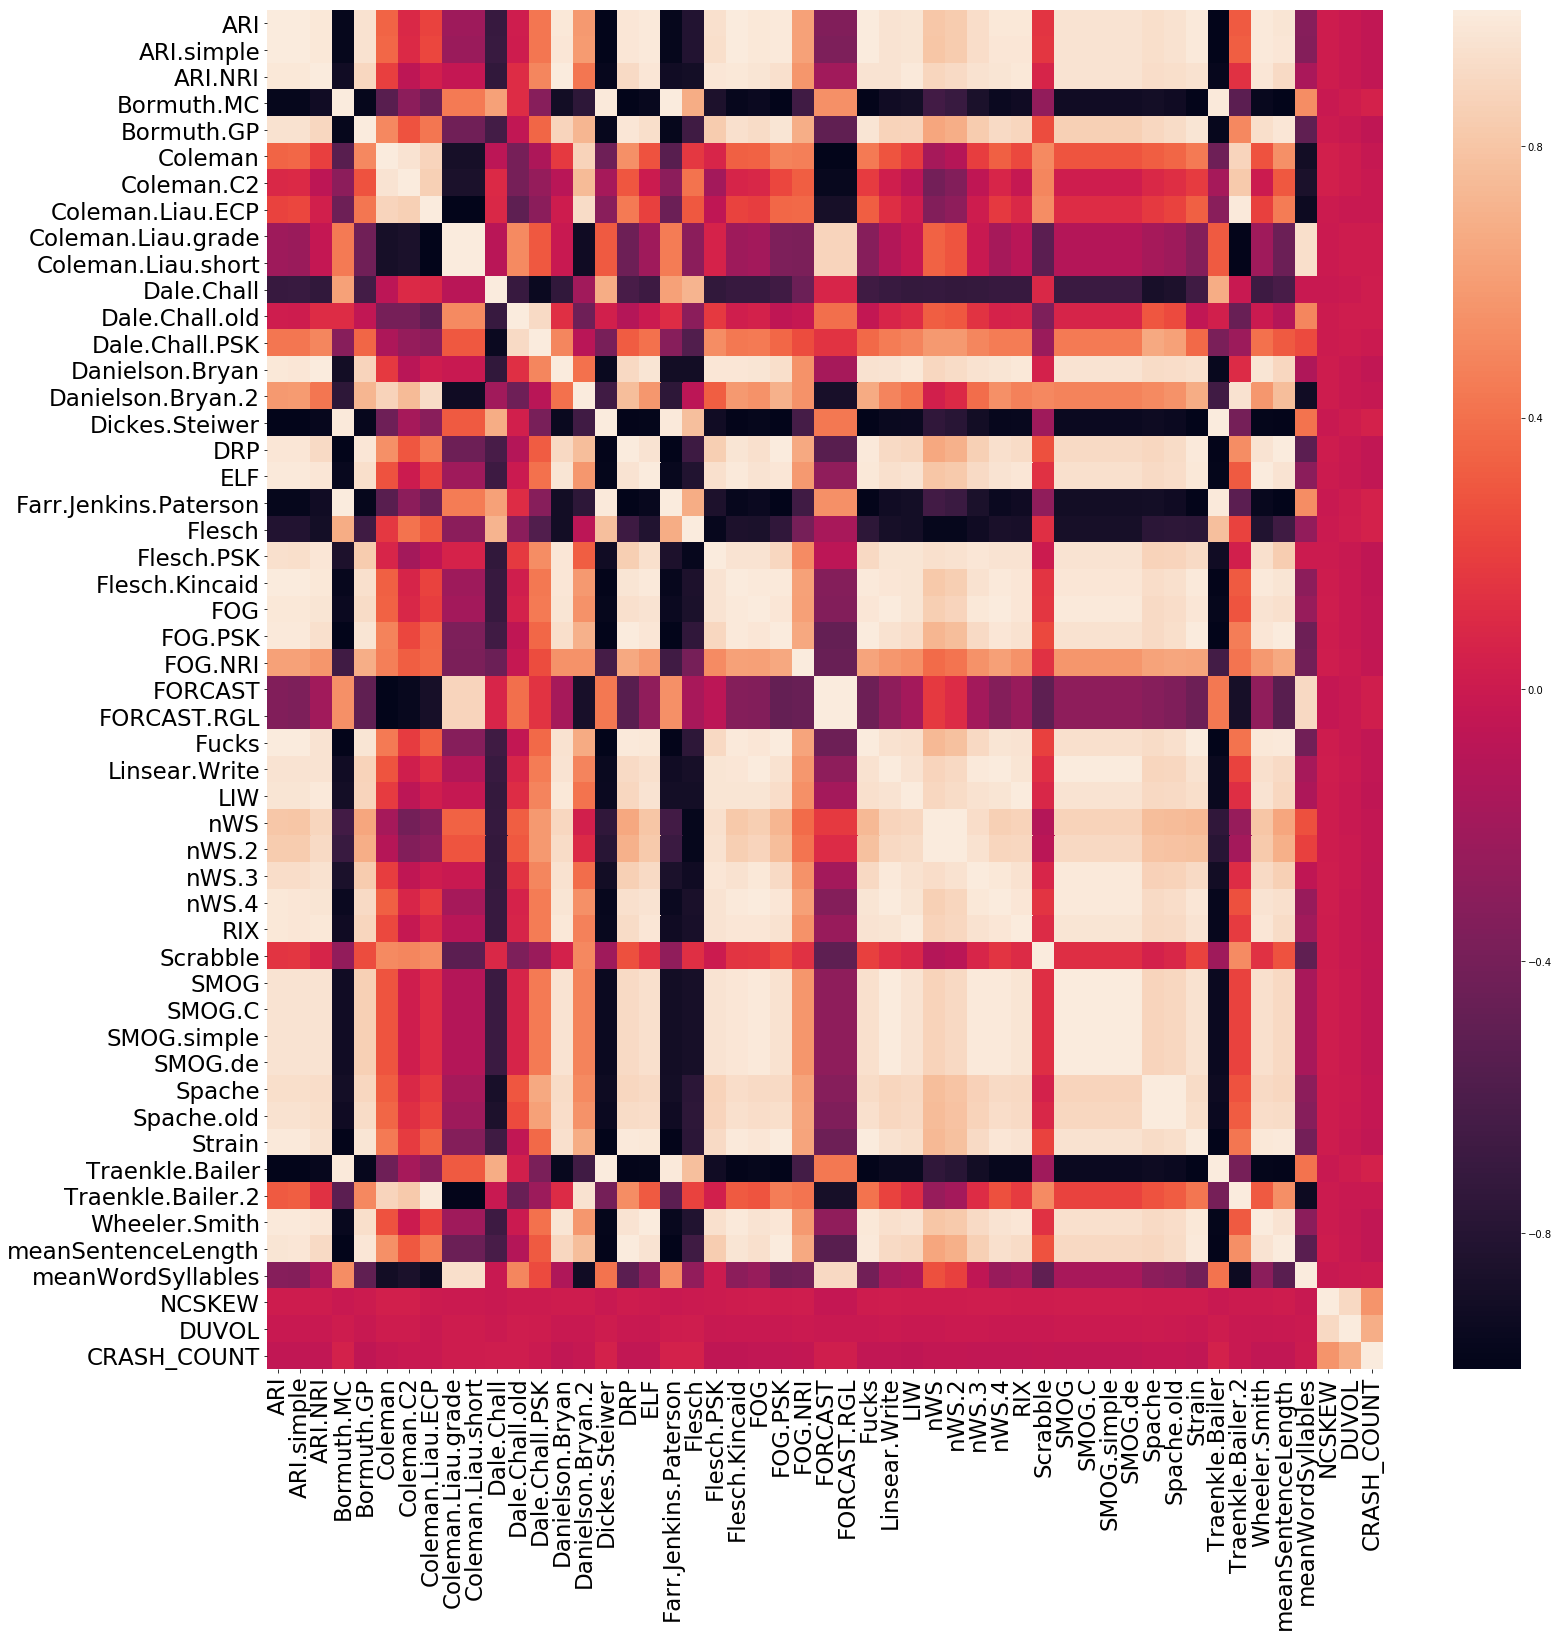

In [110]:
correlation = dataset.corr()
f, ax = plt.subplots(figsize= (25,25))
sns.heatmap(correlation)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.show()

**Bar Plot of Correlation Matrix**

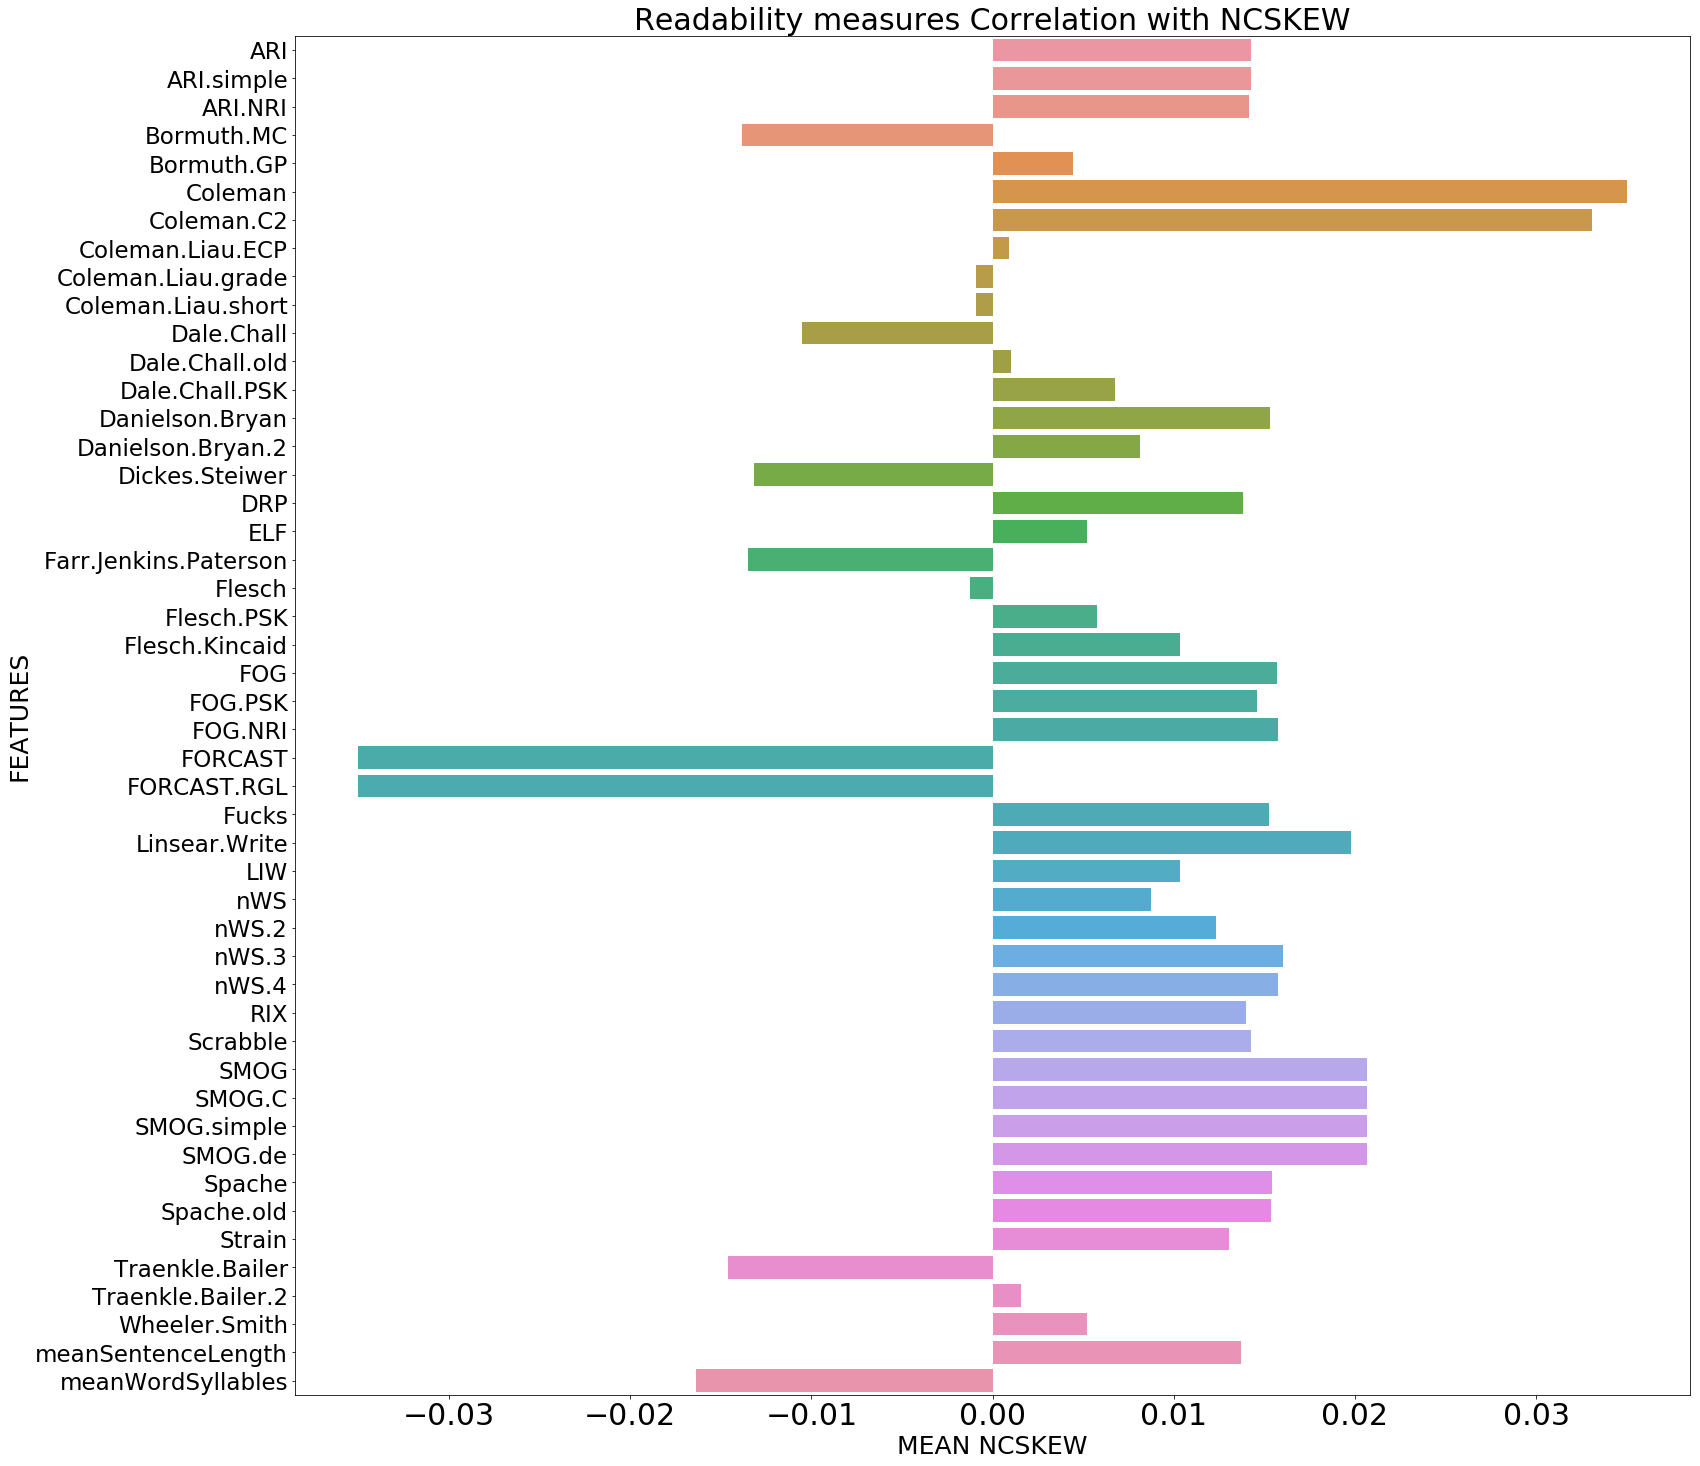

In [111]:
f, ax = plt.subplots(figsize= (25,25))
sns.barplot(x = correlation['NCSKEW'][:48], y = correlation.index[:48])
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 23)
plt.ylabel('FEATURES', fontsize= 25)
plt.xlabel('MEAN NCSKEW', fontsize= 25)
plt.title('Readability measures Correlation with NCSKEW', fontsize =30)
plt.show()

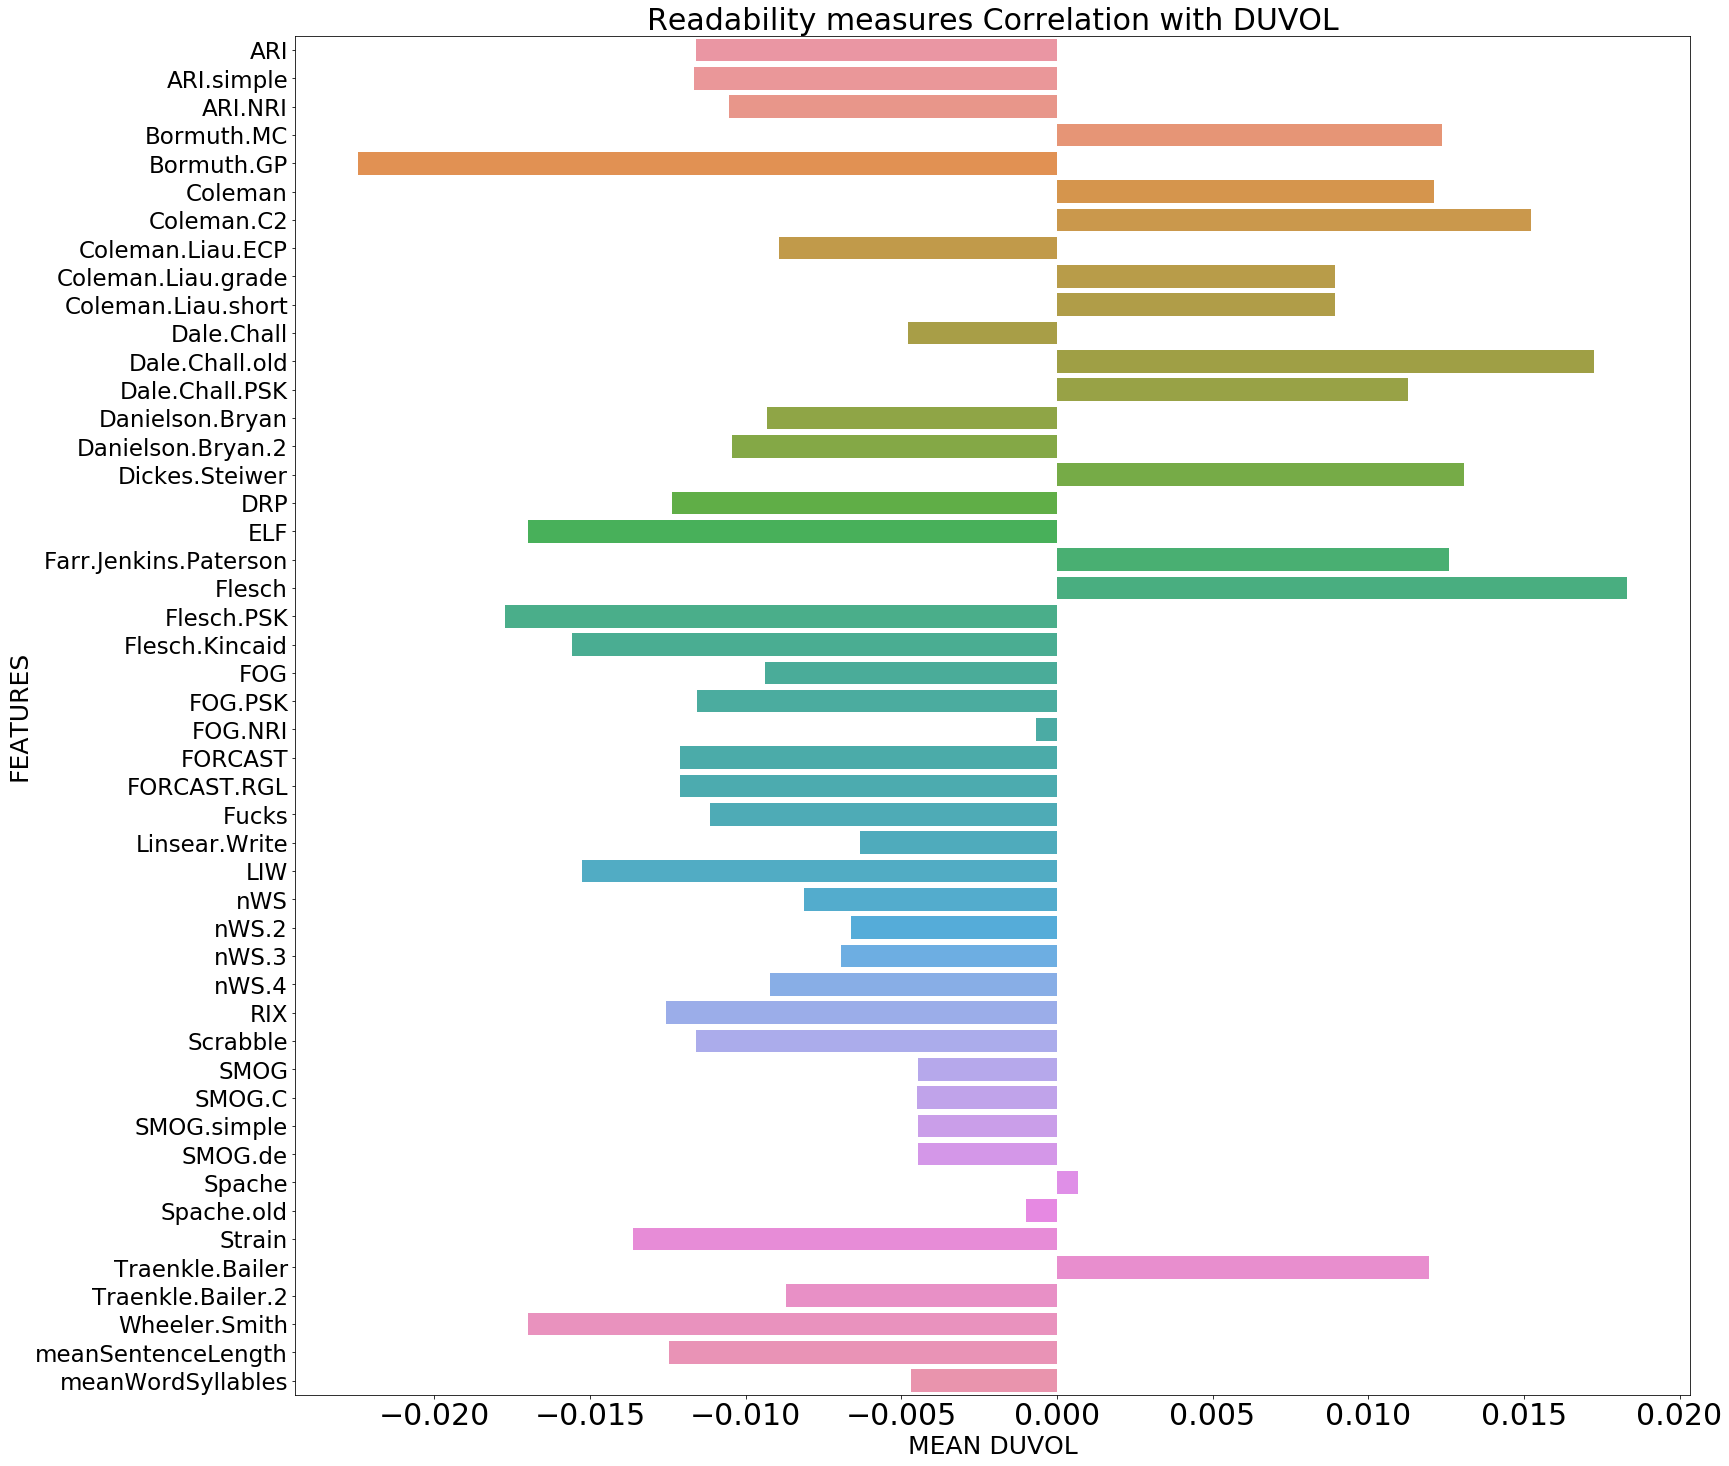

In [112]:
f, ax = plt.subplots(figsize= (25,25))
sns.barplot(x = correlation['DUVOL'][:48], y = correlation.index[:48])
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 23)
plt.ylabel('FEATURES', fontsize= 25)
plt.xlabel('MEAN DUVOL', fontsize= 25)
plt.title('Readability measures Correlation with DUVOL', fontsize =30)
plt.show()

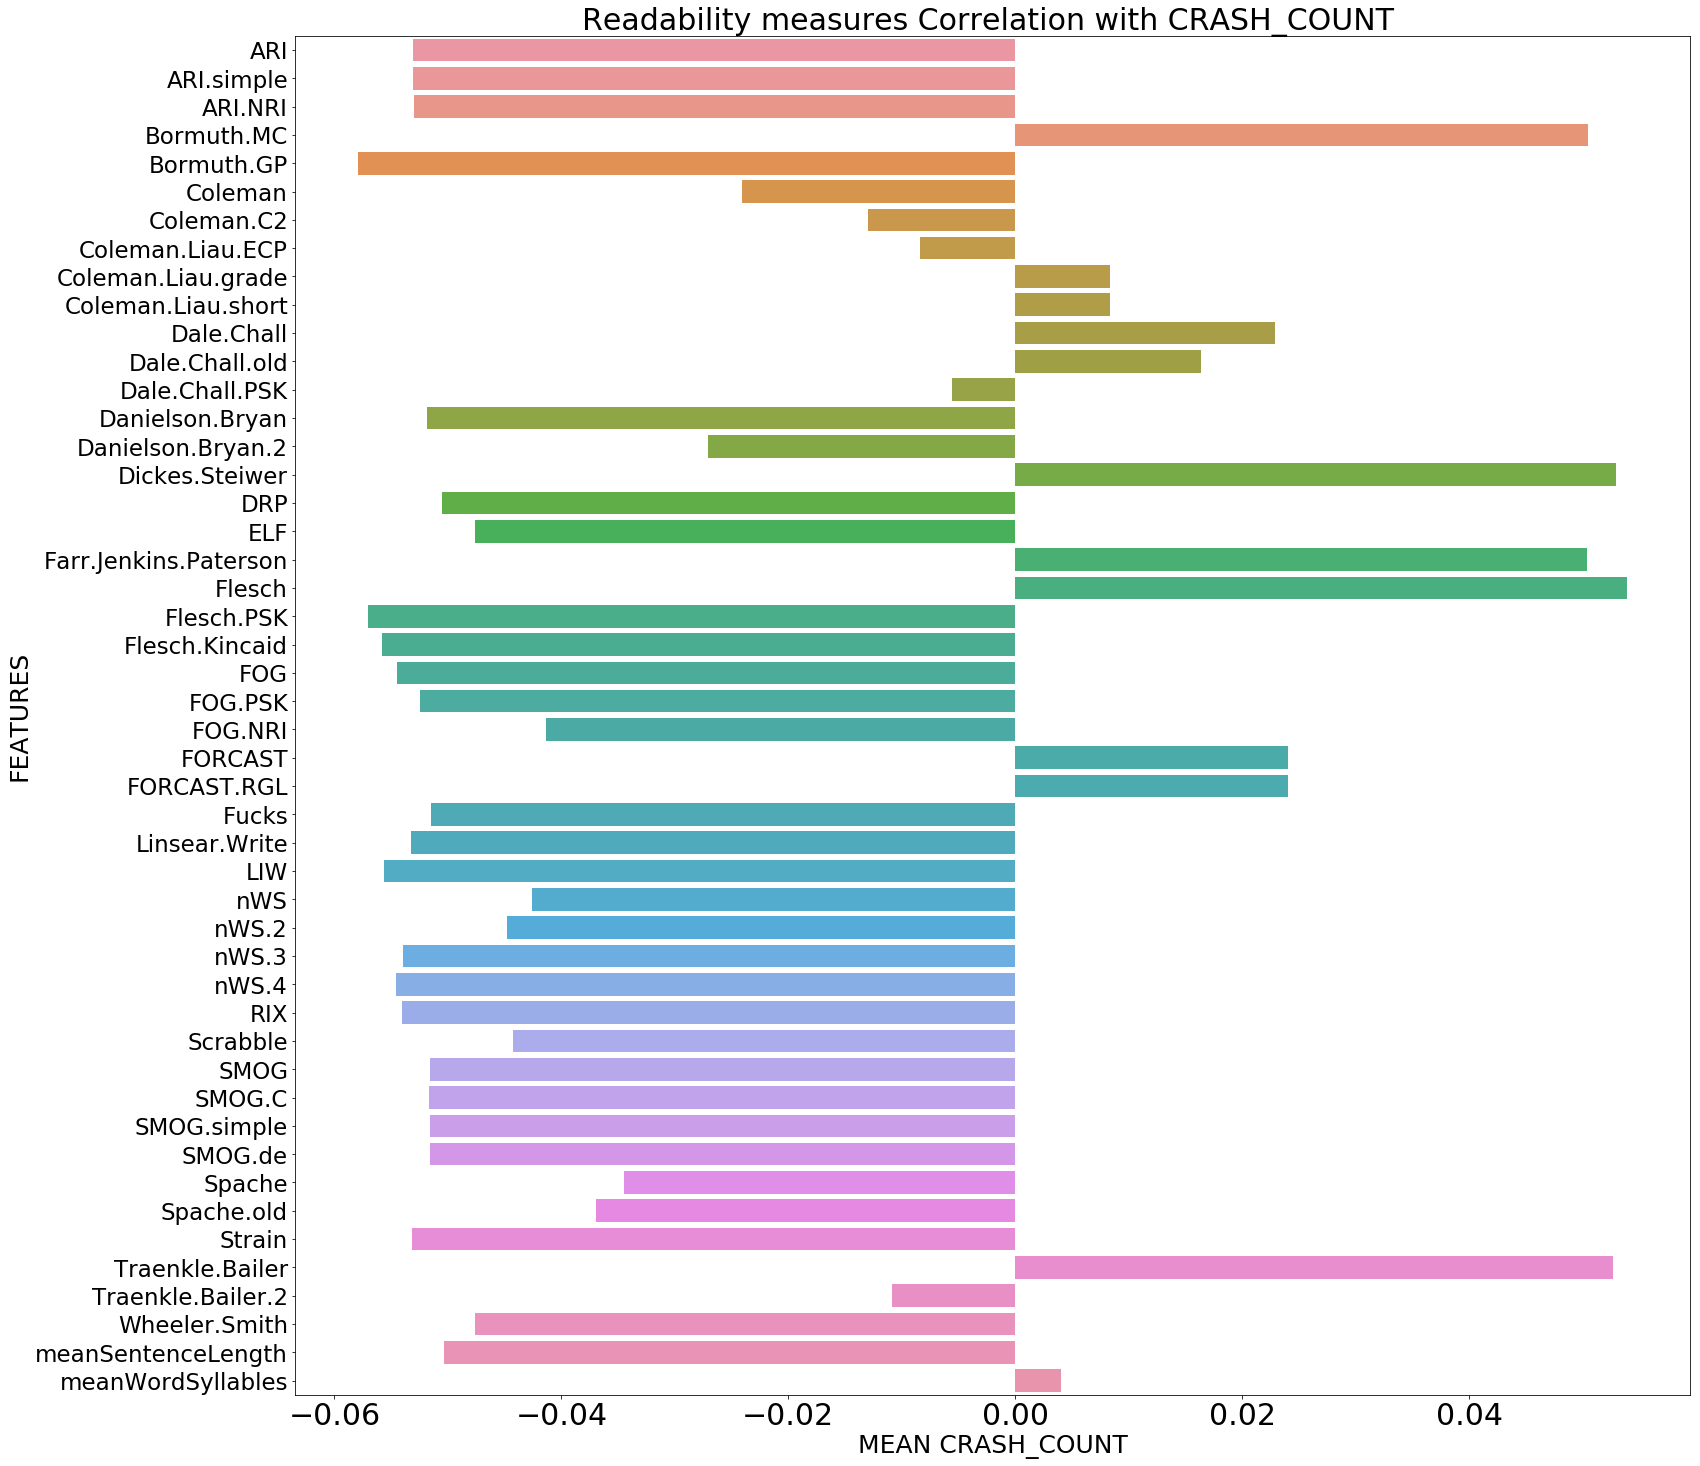

In [113]:
f, ax = plt.subplots(figsize= (25,25))
sns.barplot(x = correlation['CRASH_COUNT'][:48], y = correlation.index[:48])
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 23)
plt.ylabel('FEATURES', fontsize= 25)
plt.xlabel('MEAN CRASH_COUNT', fontsize= 25)
plt.title('Readability measures Correlation with CRASH_COUNT ', fontsize =30)
plt.show()

## Regression

* (1) Choose the 2 best algorithms and choose the measure to focus
* (2) Hyper-parametering and cross validating -> 2 algs, 1 metric?

**Split - train / test**

In [114]:
sample = dataset.values
size_sample = len(sample)
size_window = 737
period = 60
rolling_windows = []

for i in range(0, size_sample - size_window + period, period):
    rolling_windows.append([period*int(i/period), period*int(i/period) + size_window])

In [115]:
train_samp_number = int(size_window * 0.9)
test_samp_number = size_window - train_samp_number
print(rolling_windows)
print("size_window: ",size_window, "train_window: ", train_samp_number, "test_window: ", test_samp_number)

[[0, 737], [60, 797], [120, 857], [180, 917]]
size_window:  737 train_window:  663 test_window:  74


In [116]:
N_column = dataset.columns.get_loc('NCSKEW') #get the column that separes readability and crash risk

#we will use this code in every model to run the rolling window some times
for i in range(0,2):#len(rolling_windows)):
    selection_train = list(range(rolling_windows[i][0], rolling_windows[i][0]+train_samp_number))
    selection_test = list(range(rolling_windows[i][0]+train_samp_number, rolling_windows[i][1]))
    X_train,X_test = dataset.iloc[selection_train, 0:N_column], dataset.iloc[selection_test, 0:N_column]
    Y_train,Y_test = dataset.iloc[selection_train,N_column:N_column+3], dataset.iloc[selection_test,N_column:N_column+3]

In [117]:
#Y = dataset[['NCSKEW', 'DUVOL', 'CRASH_COUNT']]  #(dataset['NCSKEW'] + dataset['DUVOL'] + dataset['CRASH_COUNT'])/3
#X = dataset.drop(['NCSKEW', 'DUVOL', 'CRASH_COUNT'], axis = 1)
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=seed, test_size= 0.20)

### Linear Regression

In [128]:
results_MSE = [] #save results for 3 measures and all algorithms
results_error = [] #save results for 3 measures and all algorithms
results_NMAE = []
#feature_selection
results_MSE_fs = [] #save results for 3 measures and all algorithms
results_error_fs = [] #save results for 3 measures and all algorithms
results_NMAE_fs = []

#### All Crash Risk measures without feature selection

Linear regression
melhor dataset: NCSKEW:  3 DUVOL:  3 CRASH_COUNT:  0


'\nfig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))\naxes[0,0].scatter(linear_reg_model_NCSKEW[0].predict(X_test), Y_test[\'NCSKEW\'])\naxes[0,0].set_xlabel("Observed")\naxes[0,0].set_ylabel("Predicted")\n\naxes[0,1].scatter(linear_reg_model_NCSKEW[1].predict(X_test), Y_test[\'NCSKEW\'])\naxes[0,1].set_xlabel("Observed")\naxes[0,1].set_ylabel("Predicted")\n\naxes[1,0].scatter(linear_reg_model_NCSKEW[2].predict(X_test), Y_test[\'NCSKEW\'])\naxes[1,0].xlabel("Observed")\naxes[1,0].ylabel("Predicted")\n\naxes[1,1].scatter(linear_reg_model_NCSKEW[3].predict(X_test), Y_test[\'NCSKEW\'])\naxes[1,1].xlabel("Observed")\naxes[1,1].ylabel("Predicted")\n'

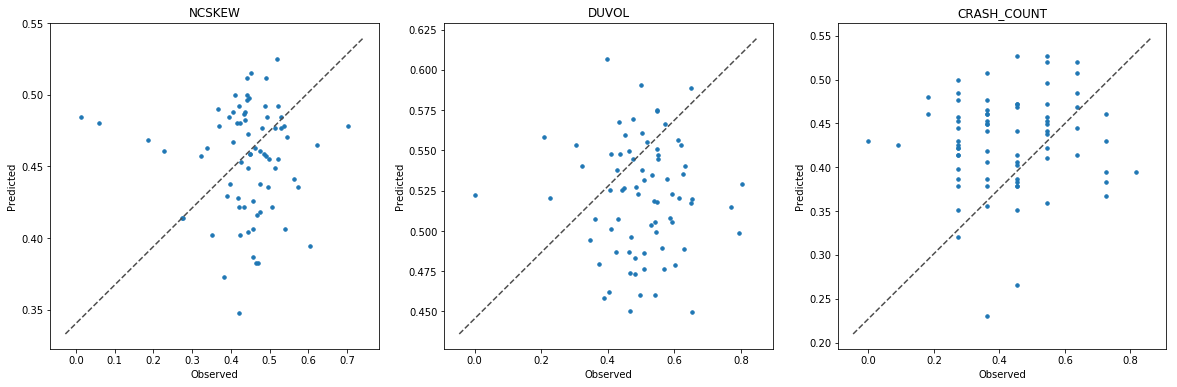

In [129]:
#we will use this code in every model to run the rolling window some times
alg_results_NCSKEW = []
alg_results_DUVOL = []
alg_results_CRASH_COUNT = []

linear_reg_model_NCSKEW = []
linear_reg_model_DUVOL = []
linear_reg_model_CRASH_COUNT = []
for i in range(0,len(rolling_windows)):
    selection_train = list(range(rolling_windows[i][0], rolling_windows[i][0]+train_samp_number))
    selection_test = list(range(rolling_windows[i][0]+train_samp_number, rolling_windows[i][1]))
    X_train,X_test = dataset.iloc[selection_train, 0:N_column], dataset.iloc[selection_test, 0:N_column]
    Y_train,Y_test = dataset.iloc[selection_train,N_column:N_column+3], dataset.iloc[selection_test,N_column:N_column+3]
    
    alg = 'Linear regression'
    linear_reg_model_NCSKEW.append(LinearRegression())
    linear_reg_model_DUVOL.append(LinearRegression())
    linear_reg_model_CRASH_COUNT.append(LinearRegression())

    linear_reg_model_NCSKEW[i].fit(X_train,Y_train['NCSKEW'])
    linear_reg_model_DUVOL[i].fit(X_train,Y_train['DUVOL'])
    linear_reg_model_CRASH_COUNT[i].fit(X_train,Y_train['CRASH_COUNT'])

    
    nmae = NMAE(Y_test['NCSKEW'], linear_reg_model_NCSKEW[i].predict(X_test))
    mae = MAE(Y_test['NCSKEW'], linear_reg_model_NCSKEW[i].predict(X_test))
    mse = MSE(Y_test['NCSKEW'], linear_reg_model_NCSKEW[i].predict(X_test))
    alg_results_NCSKEW.append([i, nmae, mae, mse])
    
    nmae = NMAE(Y_test['DUVOL'], linear_reg_model_NCSKEW[i].predict(X_test))
    mae = MAE(Y_test['DUVOL'], linear_reg_model_NCSKEW[i].predict(X_test))
    mse = MSE(Y_test['DUVOL'], linear_reg_model_NCSKEW[i].predict(X_test))
    alg_results_DUVOL.append([i, nmae, mae, mse])
    
    nmae = NMAE(Y_test['CRASH_COUNT'], linear_reg_model_NCSKEW[i].predict(X_test))
    mae = MAE(Y_test['CRASH_COUNT'], linear_reg_model_NCSKEW[i].predict(X_test))
    mse = MSE(Y_test['CRASH_COUNT'], linear_reg_model_NCSKEW[i].predict(X_test))
    alg_results_CRASH_COUNT.append([i, nmae, mae, mse])
print(alg)
melhor = 999
melhor_NCSKEW =-1
for result in alg_results_NCSKEW:
    if result[3] < melhor:
        melhor = result[3]   #using mse
        melhor_NCSKEW = result[0]
melhor = 999
melhor_DUVOL =-1
for result in alg_results_DUVOL:
    if result[3] < melhor:
        melhor = result[3]
        melhor_DUVOL = result[0]
melhor = 999
melhor_CRASH_COUNT =-1
for result in alg_results_CRASH_COUNT:
    if result[3] < melhor:
        melhor = result[3]
        melhor_CRASH_COUNT = result[0]
print("melhor dataset: NCSKEW: ", melhor_NCSKEW, "DUVOL: ",melhor_DUVOL, "CRASH_COUNT: ", melhor_CRASH_COUNT)       
# [i, nmae, mae, mse]
results_error.append([alg, alg_results_NCSKEW[melhor_NCSKEW][2], alg_results_DUVOL[melhor_DUVOL][2], alg_results_CRASH_COUNT[melhor_CRASH_COUNT][2]])
results_MSE.append([alg, alg_results_NCSKEW[melhor_NCSKEW][3], alg_results_DUVOL[melhor_DUVOL][3], alg_results_CRASH_COUNT[melhor_CRASH_COUNT][3]])
results_NMAE.append([alg, alg_results_NCSKEW[melhor_NCSKEW][1], alg_results_DUVOL[melhor_DUVOL][1], alg_results_CRASH_COUNT[melhor_CRASH_COUNT][1]])

linear_reg_model_NCSKEW = linear_reg_model_NCSKEW[melhor_NCSKEW]
linear_reg_model_DUVOL = linear_reg_model_DUVOL[melhor_DUVOL]
linear_reg_model_CRASH_COUNT = linear_reg_model_CRASH_COUNT[melhor_CRASH_COUNT]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
axes[0].scatter(Y_test['NCSKEW'], linear_reg_model_NCSKEW.predict(X_test), s=12)
axes[0].plot(axes[0].get_xlim(), axes[0].get_ylim(), ls="--", c=".3")
axes[0].set_title("NCSKEW")
axes[0].set_xlabel("Observed")
axes[0].set_ylabel("Predicted")

axes[1].scatter(Y_test['DUVOL'], linear_reg_model_DUVOL.predict(X_test), s=12)
axes[1].plot(axes[1].get_xlim(), axes[1].get_ylim(), ls="--", c=".3")
axes[1].set_title("DUVOL")
axes[1].set_xlabel("Observed")
axes[1].set_ylabel("Predicted")

axes[2].scatter(Y_test['CRASH_COUNT'], linear_reg_model_CRASH_COUNT.predict(X_test), s=12) 
axes[2].plot(axes[2].get_xlim(), axes[2].get_ylim(), ls="--", c=".3")
axes[2].set_title("CRASH_COUNT")
axes[2].set_xlabel("Observed")
axes[2].set_ylabel("Predicted")

'''
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axes[0,0].scatter(linear_reg_model_NCSKEW[0].predict(X_test), Y_test['NCSKEW'])
axes[0,0].set_xlabel("Observed")
axes[0,0].set_ylabel("Predicted")

axes[0,1].scatter(linear_reg_model_NCSKEW[1].predict(X_test), Y_test['NCSKEW'])
axes[0,1].set_xlabel("Observed")
axes[0,1].set_ylabel("Predicted")

axes[1,0].scatter(linear_reg_model_NCSKEW[2].predict(X_test), Y_test['NCSKEW'])
axes[1,0].xlabel("Observed")
axes[1,0].ylabel("Predicted")

axes[1,1].scatter(linear_reg_model_NCSKEW[3].predict(X_test), Y_test['NCSKEW'])
axes[1,1].xlabel("Observed")
axes[1,1].ylabel("Predicted")
'''

#### NCSKEW with feature selection

-----------------------------------> Linear regression - Seleted features
Initial feature number:  48
Final feature number:  12
Feature names:  ['Bormuth.MC' 'DRP' 'ELF' 'Flesch' 'Flesch.PSK' 'SMOG.simple' 'SMOG.de'
 'Spache' 'Spache.old' 'Wheeler.Smith' 'meanSentenceLength'
 'meanWordSyllables']
-----------------------------------
NCSKEW Median Absolute Error 0.07724786945632449
NCSKEW Median Absolute Error Feature selection 0.0705004856134306
----
NCSKEW Mean Squared Error 0.012899954410873203
NCSKEW Mean Squared Error Feature selection 0.01137674813834423


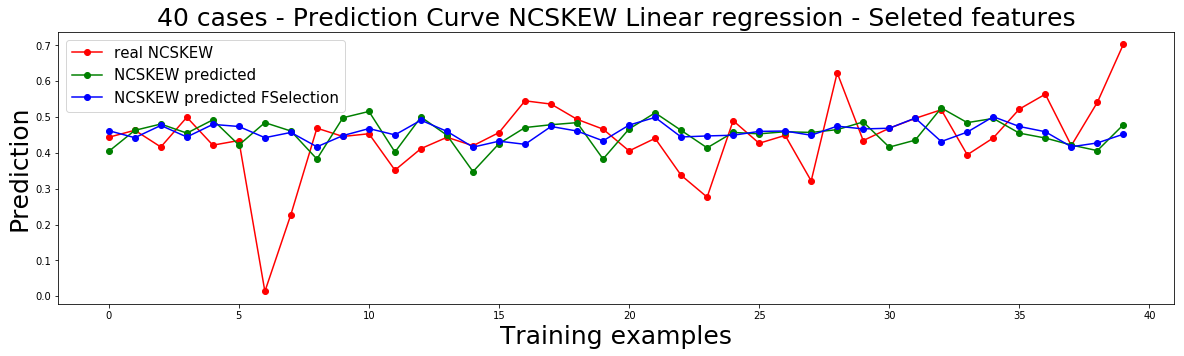

Text(0,0.5,'Predicted')

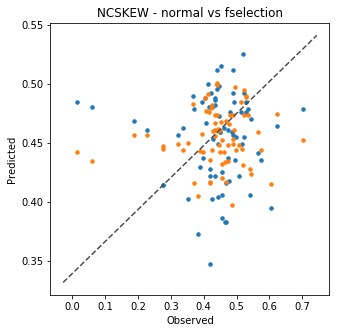

In [130]:
selection_train = list(range(rolling_windows[melhor_NCSKEW][0], rolling_windows[melhor_NCSKEW][0]+train_samp_number))
selection_test = list(range(rolling_windows[melhor_NCSKEW][0]+train_samp_number, rolling_windows[melhor_NCSKEW][1]))
X_train,X_test = dataset.iloc[selection_train, 0:N_column], dataset.iloc[selection_test, 0:N_column]
Y_train,Y_test = dataset.iloc[selection_train,N_column:N_column+3], dataset.iloc[selection_test,N_column:N_column+3]


alg = 'Linear regression - Seleted features'
print("-----------------------------------> "+ alg)
#RFE - Recursive Feature Elimination
cv_split2 = model_selection.ShuffleSplit(n_splits = 1, test_size = .2, train_size = .8, random_state = seed )

model_to_fselection = linear_reg_model_NCSKEW
target_data = Y_train['NCSKEW']

#base model
print('Initial feature number: ', X_train.shape[1]) 

model_rfe = feature_selection.RFECV(model_to_fselection, step = 1, cv = cv_split2)#scoring = 'r2_score'
model_rfe.fit(X_train, target_data)

#transform x&y to reduced features and fit new model
#alternative: can use pipeline to reduce fit and transform steps: http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
seleted_columns = X_train.columns.values[model_rfe.get_support()]

rfe_results = model_selection.cross_validate(model_to_fselection, X_train[seleted_columns], target_data, cv  = cv_split2)
#rfe_results
#print(model_rfe.grid_scores_)
print('Final feature number: ', X_train[seleted_columns].shape[1]) 
print('Feature names: ', seleted_columns)



print("-----------------------------------") 
flinear_reg_model_NCSKEW = LinearRegression()

selected_input_train = X_train[seleted_columns]
selected_input_test = X_test[seleted_columns]

flinear_reg_model_NCSKEW.fit(selected_input_train,Y_train['NCSKEW'])

#print('NCSKEW R2 Score', r2_score(Y_test['NCSKEW'], linear_reg_model_NCSKEW.predict(X_test)))
#print('NCSKEW R2 Score Feature selection', r2_score(Y_test['NCSKEW'], flinear_reg_model_NCSKEW.predict(selected_input_test)))
#print('---- ')
print('NCSKEW Median Absolute Error', MAE(Y_test['NCSKEW'],linear_reg_model_NCSKEW.predict(X_test)))
print('NCSKEW Median Absolute Error Feature selection', MAE(Y_test['NCSKEW'],flinear_reg_model_NCSKEW.predict(selected_input_test)))
print('----')
print('NCSKEW Mean Squared Error', MSE(Y_test['NCSKEW'],linear_reg_model_NCSKEW.predict(X_test)))
print('NCSKEW Mean Squared Error Feature selection', MSE(Y_test['NCSKEW'],flinear_reg_model_NCSKEW.predict(selected_input_test)))

results_error_fs.append([alg,MAE(Y_test['NCSKEW'],flinear_reg_model_NCSKEW.predict(selected_input_test))])
results_MSE_fs.append([  alg,MSE(Y_test['NCSKEW'],flinear_reg_model_NCSKEW.predict(selected_input_test))])
results_NMAE_fs.append([   alg,NMAE(Y_test['NCSKEW'],flinear_reg_model_NCSKEW.predict(selected_input_test))])

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve NCSKEW " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test['NCSKEW'][0:40], 'o-', color = 'r', label = 'real NCSKEW')
plt.plot(X_test[0:40].reset_index().index, linear_reg_model_NCSKEW.predict(X_test)[0:40] , 'o-', color = 'g', label = "NCSKEW predicted")
plt.plot(X_test[0:40].reset_index().index, flinear_reg_model_NCSKEW.predict(selected_input_test)[0:40] , 'o-', color = 'b', label = "NCSKEW predicted FSelection")
plt.legend(fontsize = 15)
plt.show()

plt.figure(figsize=(5,5))
plt.scatter(Y_test['NCSKEW'], linear_reg_model_NCSKEW.predict(X_test), s=12)
plt.scatter(Y_test['NCSKEW'], flinear_reg_model_NCSKEW.predict(selected_input_test), s=12)
plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")
plt.title("NCSKEW - normal vs fselection")
plt.xlabel("Observed")
plt.ylabel("Predicted")

#### DUVOL with feature selection

-----------------------------------> Linear regression - Seleted features
Initial feature number:  48
Final feature number:  1
Feature names:  ['DRP']
-----------------------------------
DUVOL Median Absolute Error 0.09466919694740394
DUVOL Median Absolute Error Feature selection 0.09062719136864592
----
DUVOL Mean Squared Error 0.017308757466372938
DUVOL Mean Squared Error Feature selection 0.01573992556997565


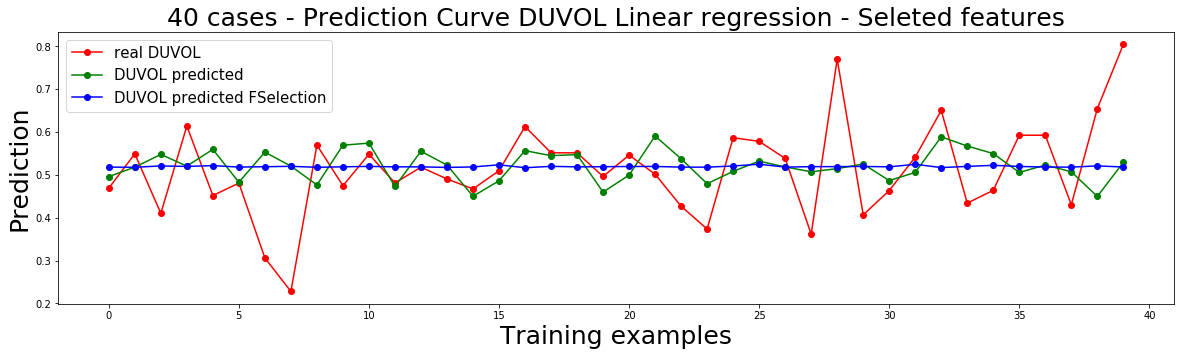

Text(0,0.5,'Predicted')

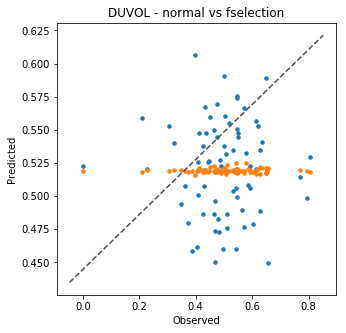

In [131]:
selection_train = list(range(rolling_windows[melhor_DUVOL][0], rolling_windows[melhor_DUVOL][0]+train_samp_number))
selection_test = list(range(rolling_windows[melhor_DUVOL][0]+train_samp_number, rolling_windows[melhor_DUVOL][1]))
X_train,X_test = dataset.iloc[selection_train, 0:N_column], dataset.iloc[selection_test, 0:N_column]
Y_train,Y_test = dataset.iloc[selection_train,N_column:N_column+3], dataset.iloc[selection_test,N_column:N_column+3]


alg = 'Linear regression - Seleted features'
print("-----------------------------------> "+ alg)
#RFE - Recursive Feature Elimination
cv_split2 = model_selection.ShuffleSplit(n_splits = 1, test_size = .2, train_size = .8, random_state = seed )

model_to_fselection = linear_reg_model_DUVOL
target_data = Y_train['DUVOL']

#base model
print('Initial feature number: ', X_train.shape[1]) 

model_rfe = feature_selection.RFECV(model_to_fselection, step = 1, cv = cv_split2)#scoring = 'r2_score'
model_rfe.fit(X_train, target_data)

#transform x&y to reduced features and fit new model
#alternative: can use pipeline to reduce fit and transform steps: http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
seleted_columns = X_train.columns.values[model_rfe.get_support()]

rfe_results = model_selection.cross_validate(model_to_fselection, X_train[seleted_columns], target_data, cv  = cv_split2)
#rfe_results
#print(model_rfe.grid_scores_)
print('Final feature number: ', X_train[seleted_columns].shape[1]) 
print('Feature names: ', seleted_columns)


print("-----------------------------------") 
flinear_reg_model_DUVOL = LinearRegression()

selected_input_train = X_train[seleted_columns]
selected_input_test = X_test[seleted_columns]

flinear_reg_model_DUVOL.fit(selected_input_train,Y_train['DUVOL'])

#print('DUVOL R2 Score', r2_score(Y_test['DUVOL'], linear_reg_model_DUVOL.predict(X_test)))
#print('DUVOL R2 Score Feature selection', r2_score(Y_test['DUVOL'], flinear_reg_model_DUVOL.predict(selected_input_test)))
#print('---- ')
print('DUVOL Median Absolute Error', MAE(Y_test['DUVOL'],linear_reg_model_DUVOL.predict(X_test)))
print('DUVOL Median Absolute Error Feature selection', MAE(Y_test['DUVOL'],flinear_reg_model_DUVOL.predict(selected_input_test)))
print('----')
print('DUVOL Mean Squared Error', MSE(Y_test['DUVOL'],linear_reg_model_DUVOL.predict(X_test)))
print('DUVOL Mean Squared Error Feature selection', MSE(Y_test['DUVOL'],flinear_reg_model_DUVOL.predict(selected_input_test)))

results_error_fs.append([alg,MAE(Y_test['DUVOL'],flinear_reg_model_DUVOL.predict(selected_input_test))])
results_MSE_fs.append([  alg,MSE(Y_test['DUVOL'],flinear_reg_model_DUVOL.predict(selected_input_test))])
results_NMAE_fs.append([   alg,NMAE(Y_test['DUVOL'],flinear_reg_model_DUVOL.predict(selected_input_test))])

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve DUVOL " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test['DUVOL'][0:40], 'o-', color = 'r', label = 'real DUVOL')
plt.plot(X_test[0:40].reset_index().index, linear_reg_model_DUVOL.predict(X_test)[0:40] , 'o-', color = 'g', label = "DUVOL predicted")
plt.plot(X_test[0:40].reset_index().index, flinear_reg_model_DUVOL.predict(selected_input_test)[0:40] , 'o-', color = 'b', label = "DUVOL predicted FSelection")
plt.legend(fontsize = 15)
plt.show()

plt.figure(figsize=(5,5))
plt.scatter(Y_test['DUVOL'], linear_reg_model_DUVOL.predict(X_test), s=12)
plt.scatter(Y_test['DUVOL'], flinear_reg_model_DUVOL.predict(selected_input_test), s=12)
plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")
plt.title("DUVOL - normal vs fselection")
plt.xlabel("Observed")
plt.ylabel("Predicted")

#### Crash Count with feature selection

-----------------------------------> Linear regression - Seleted features
Initial feature number:  48
Final feature number:  3
Feature names:  ['Bormuth.MC' 'DRP' 'SMOG.de']
-----------------------------------
CRASH_COUNT Median Absolute Error 0.1294053286240786
CRASH_COUNT Median Absolute Error Feature selection 0.11956772113022113
----
CRASH_COUNT Mean Squared Error 0.027393541299846797
CRASH_COUNT Mean Squared Error Feature selection 0.023926834402964114


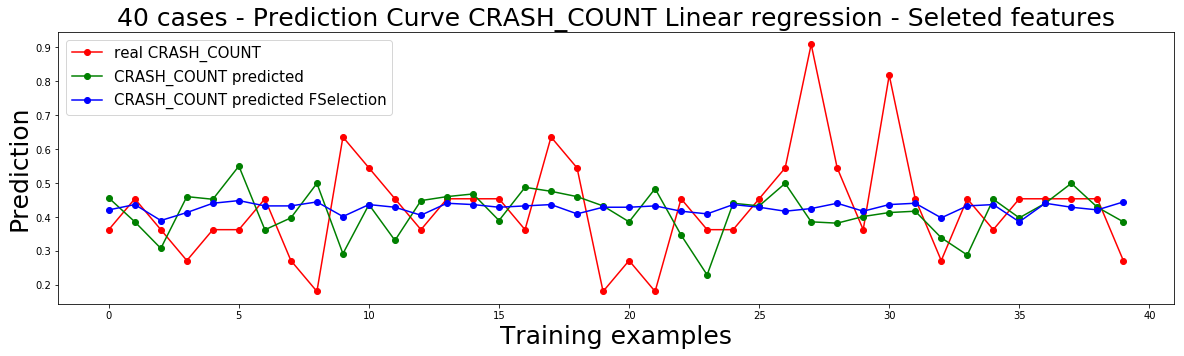

Text(0,0.5,'Predicted')

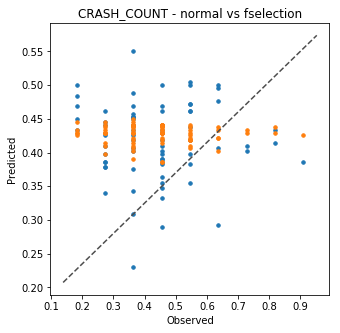

In [132]:
selection_train = list(range(rolling_windows[melhor_CRASH_COUNT][0], rolling_windows[melhor_CRASH_COUNT][0]+train_samp_number))
selection_test = list(range(rolling_windows[melhor_CRASH_COUNT][0]+train_samp_number, rolling_windows[melhor_CRASH_COUNT][1]))
X_train,X_test = dataset.iloc[selection_train, 0:N_column], dataset.iloc[selection_test, 0:N_column]
Y_train,Y_test = dataset.iloc[selection_train,N_column:N_column+3], dataset.iloc[selection_test,N_column:N_column+3]

alg = 'Linear regression - Seleted features'
print("-----------------------------------> "+ alg)
#RFE - Recursive Feature Elimination
cv_split2 = model_selection.ShuffleSplit(n_splits = 1, test_size = .2, train_size = .8, random_state = seed )

model_to_fselection = linear_reg_model_CRASH_COUNT
target_data = Y_train['CRASH_COUNT']

#base model
print('Initial feature number: ', X_train.shape[1]) 

model_rfe = feature_selection.RFECV(model_to_fselection, step = 1, cv = cv_split2)#scoring = 'r2_score'
model_rfe.fit(X_train, target_data)

#transform x&y to reduced features and fit new model
#alternative: can use pipeline to reduce fit and transform steps: http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
seleted_columns = X_train.columns.values[model_rfe.get_support()]

rfe_results = model_selection.cross_validate(model_to_fselection, X_train[seleted_columns], target_data, cv  = cv_split2)
#rfe_results
#print(model_rfe.grid_scores_)
print('Final feature number: ', X_train[seleted_columns].shape[1]) 
print('Feature names: ', seleted_columns)


print("-----------------------------------") 
flinear_reg_model_CRASH_COUNT = LinearRegression()

selected_input_train = X_train[seleted_columns]
selected_input_test = X_test[seleted_columns]

flinear_reg_model_CRASH_COUNT.fit(selected_input_train,Y_train['CRASH_COUNT'])

#print('CRASH_COUNT R2 Score', r2_score(Y_test['CRASH_COUNT'], linear_reg_model_CRASH_COUNT.predict(X_test)))
#print('CRASH_COUNT R2 Score Feature selection', r2_score(Y_test['CRASH_COUNT'], flinear_reg_model_CRASH_COUNT.predict(selected_input_test)))
#print('---- ')
print('CRASH_COUNT Median Absolute Error', MAE(Y_test['CRASH_COUNT'],linear_reg_model_CRASH_COUNT.predict(X_test)))
print('CRASH_COUNT Median Absolute Error Feature selection', MAE(Y_test['CRASH_COUNT'],flinear_reg_model_CRASH_COUNT.predict(selected_input_test)))
print('----')
print('CRASH_COUNT Mean Squared Error', MSE(Y_test['CRASH_COUNT'],linear_reg_model_CRASH_COUNT.predict(X_test)))
print('CRASH_COUNT Mean Squared Error Feature selection', MSE(Y_test['CRASH_COUNT'],flinear_reg_model_CRASH_COUNT.predict(selected_input_test)))

results_error_fs.append([alg,MAE(Y_test['CRASH_COUNT'],flinear_reg_model_CRASH_COUNT.predict(selected_input_test))])
results_MSE_fs.append([  alg,MSE(Y_test['CRASH_COUNT'],flinear_reg_model_CRASH_COUNT.predict(selected_input_test))])
results_NMAE_fs.append([   alg,NMAE(Y_test['CRASH_COUNT'],flinear_reg_model_CRASH_COUNT.predict(selected_input_test))])

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve CRASH_COUNT " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test['CRASH_COUNT'][0:40], 'o-', color = 'r', label = 'real CRASH_COUNT')
plt.plot(X_test[0:40].reset_index().index, linear_reg_model_CRASH_COUNT.predict(X_test)[0:40] , 'o-', color = 'g', label = "CRASH_COUNT predicted")
plt.plot(X_test[0:40].reset_index().index, flinear_reg_model_CRASH_COUNT.predict(selected_input_test)[0:40] , 'o-', color = 'b', label = "CRASH_COUNT predicted FSelection")
plt.legend(fontsize = 15)
plt.show()

plt.figure(figsize=(5,5))
plt.scatter(Y_test['CRASH_COUNT'], linear_reg_model_CRASH_COUNT.predict(X_test), s=12)
plt.scatter(Y_test['CRASH_COUNT'], flinear_reg_model_CRASH_COUNT.predict(selected_input_test), s=12)
plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")
plt.title("CRASH_COUNT - normal vs fselection")
plt.xlabel("Observed")
plt.ylabel("Predicted")



### Simple Vector Regression

#### All Crash Risk measures without feature selection

/home/programs/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/programs/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/programs/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/programs/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarni

Simple Vector Regression
melhor dataset: NCSKEW:  3 DUVOL:  3 CRASH_COUNT:  0


Text(0,0.5,'Predicted')

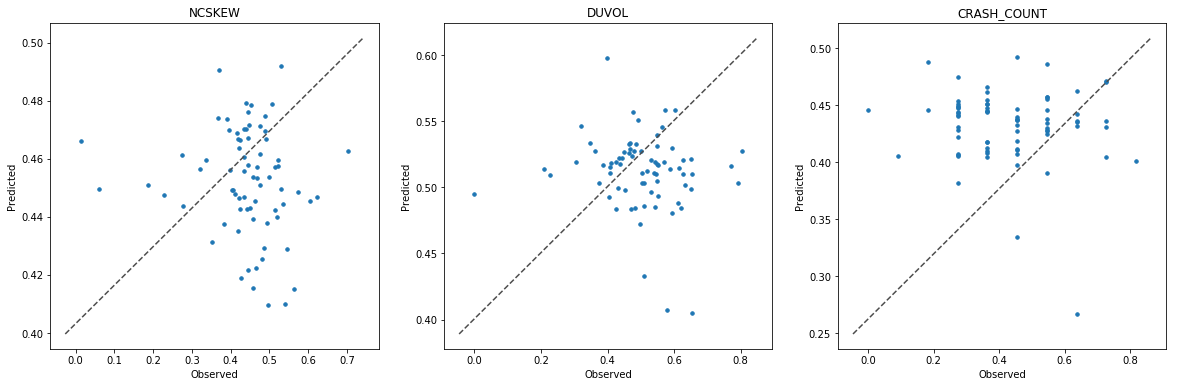

In [133]:
#we will use this code in every model to run the rolling window some times
alg_results_NCSKEW = []
alg_results_DUVOL = []
alg_results_CRASH_COUNT = []

svreg_NCSKEW = []
svreg_DUVOL = []
svreg_CRASH_COUNT = []
for i in range(0,len(rolling_windows)):
    selection_train = list(range(rolling_windows[i][0], rolling_windows[i][0]+train_samp_number))
    selection_test = list(range(rolling_windows[i][0]+train_samp_number, rolling_windows[i][1]))
    X_train,X_test = dataset.iloc[selection_train, 0:N_column], dataset.iloc[selection_test, 0:N_column]
    Y_train,Y_test = dataset.iloc[selection_train,N_column:N_column+3], dataset.iloc[selection_test,N_column:N_column+3]
    
    alg = 'Simple Vector Regression'
    svreg_NCSKEW.append(svm.SVR(epsilon = 0.01, C = 80))
    svreg_DUVOL.append(svm.SVR(epsilon = 0.01, C = 80))
    svreg_CRASH_COUNT.append(svm.SVR(epsilon = 0.01, C = 80))

    svreg_NCSKEW[i].fit(X_train,Y_train['NCSKEW'])
    svreg_DUVOL[i].fit(X_train,Y_train['DUVOL'])
    svreg_CRASH_COUNT[i].fit(X_train,Y_train['CRASH_COUNT'])

    
    nmae = NMAE(Y_test['NCSKEW'], svreg_NCSKEW[i].predict(X_test))
    mae = MAE(Y_test['NCSKEW'], svreg_NCSKEW[i].predict(X_test))
    mse = MSE(Y_test['NCSKEW'], svreg_NCSKEW[i].predict(X_test))
    alg_results_NCSKEW.append([i, nmae, mae, mse])
    
    nmae = NMAE(Y_test['DUVOL'], svreg_NCSKEW[i].predict(X_test))
    mae = MAE(Y_test['DUVOL'], svreg_NCSKEW[i].predict(X_test))
    mse = MSE(Y_test['DUVOL'], svreg_NCSKEW[i].predict(X_test))
    alg_results_DUVOL.append([i, nmae, mae, mse])
    
    nmae = NMAE(Y_test['CRASH_COUNT'], svreg_NCSKEW[i].predict(X_test))
    mae = MAE(Y_test['CRASH_COUNT'], svreg_NCSKEW[i].predict(X_test))
    mse = MSE(Y_test['CRASH_COUNT'], svreg_NCSKEW[i].predict(X_test))
    alg_results_CRASH_COUNT.append([i, nmae, mae, mse])
print(alg)
melhor = 999
melhor_NCSKEW =-1
for result in alg_results_NCSKEW:
    if result[3] < melhor:
        melhor = result[3]   #using mse
        melhor_NCSKEW = result[0]
melhor = 999
melhor_DUVOL =-1
for result in alg_results_DUVOL:
    if result[3] < melhor:
        melhor = result[3]
        melhor_DUVOL = result[0]
melhor = 999
melhor_CRASH_COUNT =-1
for result in alg_results_CRASH_COUNT:
    if result[3] < melhor:
        melhor = result[3]
        melhor_CRASH_COUNT = result[0]
print("melhor dataset: NCSKEW: ", melhor_NCSKEW, "DUVOL: ",melhor_DUVOL, "CRASH_COUNT: ", melhor_CRASH_COUNT)       
# [i, nmae, mae, mse]
results_error.append([alg, alg_results_NCSKEW[melhor_NCSKEW][2], alg_results_DUVOL[melhor_DUVOL][2], alg_results_CRASH_COUNT[melhor_CRASH_COUNT][2]])
results_MSE.append([alg, alg_results_NCSKEW[melhor_NCSKEW][3], alg_results_DUVOL[melhor_DUVOL][3], alg_results_CRASH_COUNT[melhor_CRASH_COUNT][3]])
results_NMAE.append([alg, alg_results_NCSKEW[melhor_NCSKEW][1], alg_results_DUVOL[melhor_DUVOL][1], alg_results_CRASH_COUNT[melhor_CRASH_COUNT][1]])

svreg_NCSKEW = svreg_NCSKEW[melhor_NCSKEW]
svreg_DUVOL = svreg_DUVOL[melhor_DUVOL]
svreg_CRASH_COUNT = svreg_CRASH_COUNT[melhor_CRASH_COUNT]


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
axes[0].scatter(Y_test['NCSKEW'], svreg_NCSKEW.predict(X_test), s=12)
axes[0].plot(axes[0].get_xlim(), axes[0].get_ylim(), ls="--", c=".3")
axes[0].set_title("NCSKEW")
axes[0].set_xlabel("Observed")
axes[0].set_ylabel("Predicted")

axes[1].scatter(Y_test['DUVOL'], svreg_DUVOL.predict(X_test), s=12)
axes[1].plot(axes[1].get_xlim(), axes[1].get_ylim(), ls="--", c=".3")
axes[1].set_title("DUVOL")
axes[1].set_xlabel("Observed")
axes[1].set_ylabel("Predicted")

axes[2].scatter(Y_test['CRASH_COUNT'], svreg_CRASH_COUNT.predict(X_test), s=12)
axes[2].plot(axes[2].get_xlim(), axes[2].get_ylim(), ls="--", c=".3")
axes[2].set_title("CRASH_COUNT")
axes[2].set_xlabel("Observed")
axes[2].set_ylabel("Predicted")

#### WIthout feature selection: The classifier does not expose feature importances

### Gradient Boosting Regressor

#### All Crash Risk measures without feature selection

Gradient Boosting Regressor
melhor dataset: NCSKEW:  3 DUVOL:  3 CRASH_COUNT:  1


Text(0,0.5,'Predicted')

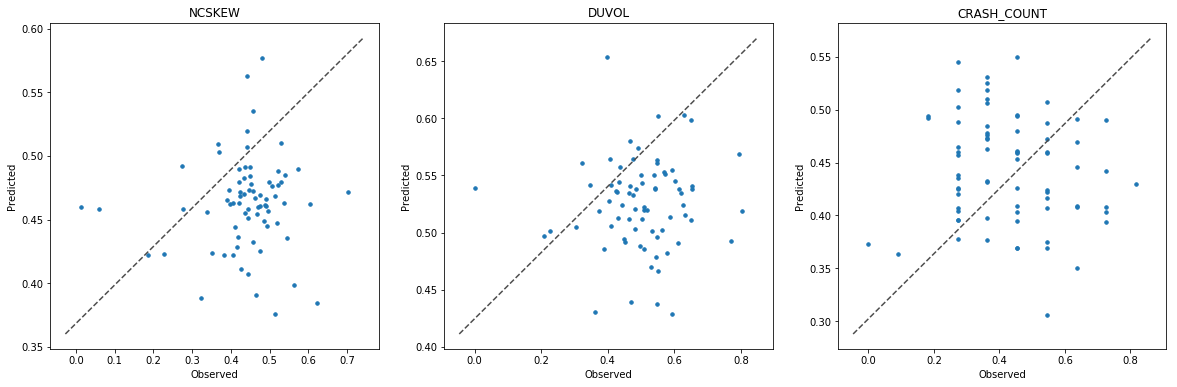

In [134]:
#we will use this code in every model to run the rolling window some times
alg_results_NCSKEW = []
alg_results_DUVOL = []
alg_results_CRASH_COUNT = []

gbr_NCSKEW = []
gbr_DUVOL = []
gbr_CRASH_COUNT = []
for i in range(0,len(rolling_windows)):
    selection_train = list(range(rolling_windows[i][0], rolling_windows[i][0]+train_samp_number))
    selection_test = list(range(rolling_windows[i][0]+train_samp_number, rolling_windows[i][1]))
    X_train,X_test = dataset.iloc[selection_train, 0:N_column], dataset.iloc[selection_test, 0:N_column]
    Y_train,Y_test = dataset.iloc[selection_train,N_column:N_column+3], dataset.iloc[selection_test,N_column:N_column+3]
    
    alg = 'Gradient Boosting Regressor'
    
    gbr_NCSKEW.append(GradientBoostingRegressor())
    gbr_DUVOL.append(GradientBoostingRegressor())
    gbr_CRASH_COUNT.append(GradientBoostingRegressor())

    gbr_NCSKEW[i].fit(X_train,Y_train['NCSKEW'])
    gbr_DUVOL[i].fit(X_train,Y_train['DUVOL'])
    gbr_CRASH_COUNT[i].fit(X_train,Y_train['CRASH_COUNT'])

    
    nmae = NMAE(Y_test['NCSKEW'], gbr_NCSKEW[i].predict(X_test))
    mae = MAE(Y_test['NCSKEW'], gbr_NCSKEW[i].predict(X_test))
    mse = MSE(Y_test['NCSKEW'], gbr_NCSKEW[i].predict(X_test))
    alg_results_NCSKEW.append([i, nmae, mae, mse])
    
    nmae = NMAE(Y_test['DUVOL'], gbr_NCSKEW[i].predict(X_test))
    mae = MAE(Y_test['DUVOL'], gbr_NCSKEW[i].predict(X_test))
    mse = MSE(Y_test['DUVOL'], gbr_NCSKEW[i].predict(X_test))
    alg_results_DUVOL.append([i, nmae, mae, mse])
    
    nmae = NMAE(Y_test['CRASH_COUNT'], gbr_NCSKEW[i].predict(X_test))
    mae = MAE(Y_test['CRASH_COUNT'], gbr_NCSKEW[i].predict(X_test))
    mse = MSE(Y_test['CRASH_COUNT'], gbr_NCSKEW[i].predict(X_test))
    alg_results_CRASH_COUNT.append([i, nmae, mae, mse])
print(alg)
melhor = 999
melhor_NCSKEW =-1
for result in alg_results_NCSKEW:
    if result[3] < melhor:
        melhor = result[3]   #using mse
        melhor_NCSKEW = result[0]
melhor = 999
melhor_DUVOL =-1
for result in alg_results_DUVOL:
    if result[3] < melhor:
        melhor = result[3]
        melhor_DUVOL = result[0]
melhor = 999
melhor_CRASH_COUNT =-1
for result in alg_results_CRASH_COUNT:
    if result[3] < melhor:
        melhor = result[3]
        melhor_CRASH_COUNT = result[0]
print("melhor dataset: NCSKEW: ", melhor_NCSKEW, "DUVOL: ",melhor_DUVOL, "CRASH_COUNT: ", melhor_CRASH_COUNT)    
# [i, nmae, mae, mse]
results_error.append([alg, alg_results_NCSKEW[melhor_NCSKEW][2], alg_results_DUVOL[melhor_DUVOL][2], alg_results_CRASH_COUNT[melhor_CRASH_COUNT][2]])
results_MSE.append([alg, alg_results_NCSKEW[melhor_NCSKEW][3], alg_results_DUVOL[melhor_DUVOL][3], alg_results_CRASH_COUNT[melhor_CRASH_COUNT][3]])
results_NMAE.append([alg, alg_results_NCSKEW[melhor_NCSKEW][1], alg_results_DUVOL[melhor_DUVOL][1], alg_results_CRASH_COUNT[melhor_CRASH_COUNT][1]])

gbr_NCSKEW = gbr_NCSKEW[melhor_NCSKEW]
gbr_DUVOL = gbr_DUVOL[melhor_DUVOL]
gbr_CRASH_COUNT = gbr_CRASH_COUNT[melhor_CRASH_COUNT]


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
axes[0].scatter(Y_test['NCSKEW'], gbr_NCSKEW.predict(X_test), s=12)
axes[0].plot(axes[0].get_xlim(), axes[0].get_ylim(), ls="--", c=".3")
axes[0].set_title("NCSKEW")
axes[0].set_xlabel("Observed")
axes[0].set_ylabel("Predicted")

axes[1].scatter(Y_test['DUVOL'], gbr_DUVOL.predict(X_test), s=12)
axes[1].plot(axes[1].get_xlim(), axes[1].get_ylim(), ls="--", c=".3")
axes[1].set_title("DUVOL")
axes[1].set_xlabel("Observed")
axes[1].set_ylabel("Predicted")

axes[2].scatter(Y_test['CRASH_COUNT'], gbr_CRASH_COUNT.predict(X_test), s=12)
axes[2].plot(axes[2].get_xlim(), axes[2].get_ylim(), ls="--", c=".3")
axes[2].set_title("CRASH_COUNT")
axes[2].set_xlabel("Observed")
axes[2].set_ylabel("Predicted")

#### NCSKEW with feature selection

-----------------------------------> Gradient Boosting Regressor - Sel features
Initial feature number:  48
Final feature number:  7
Feature names:  ['Coleman.C2' 'Coleman.Liau.ECP' 'ELF' 'FOG.NRI' 'Scrabble' 'SMOG.simple'
 'Spache.old']
-----------------------------------
NCSKEW Median Absolute Error 0.07613152561338361
NCSKEW Median Absolute Error Feature selection 0.07225844970045965
----
NCSKEW Mean Squared Error 0.012364710950650504
NCSKEW Mean Squared Error Feature selection 0.012255613310366877


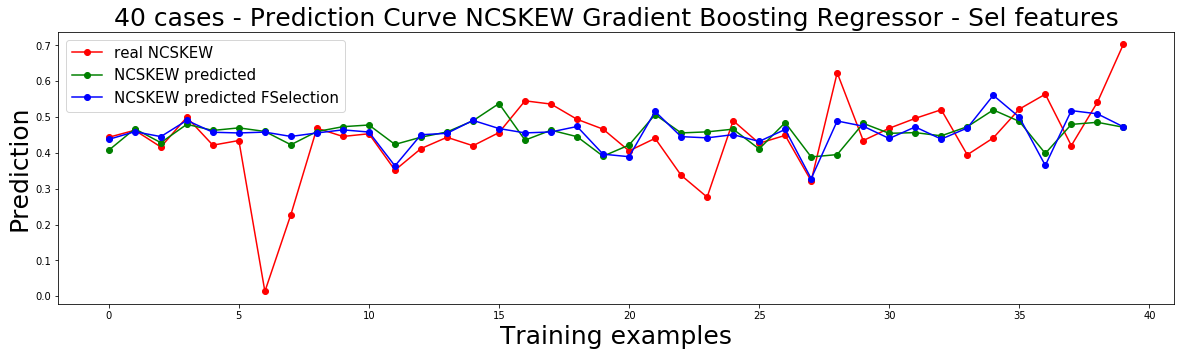

Text(0,0.5,'Predicted')

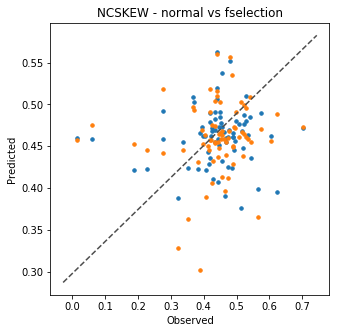

In [145]:
selection_train = list(range(rolling_windows[melhor_NCSKEW][0], rolling_windows[melhor_NCSKEW][0]+train_samp_number))
selection_test = list(range(rolling_windows[melhor_NCSKEW][0]+train_samp_number, rolling_windows[melhor_NCSKEW][1]))
X_train,X_test = dataset.iloc[selection_train, 0:N_column], dataset.iloc[selection_test, 0:N_column]
Y_train,Y_test = dataset.iloc[selection_train,N_column:N_column+3], dataset.iloc[selection_test,N_column:N_column+3]

alg = 'Gradient Boosting Regressor - Sel features'
print("-----------------------------------> "+ alg)
#RFE - Recursive Feature Elimination
cv_split2 = model_selection.ShuffleSplit(n_splits = 1, test_size = .2, train_size = .8, random_state = seed )

model_to_fselection = gbr_NCSKEW
target_data = Y_train['NCSKEW']

#print("base_results")
base_results = model_selection.cross_validate(model_to_fselection, X_train, target_data, cv  = cv_split2)

#base model
print('Initial feature number: ', X_train.shape[1]) 

#print('Feature names: ', X_train.columns.values)
model_to_fselection.fit(X_train, target_data)
#feature selection

model_rfe = feature_selection.RFECV(model_to_fselection, step = 1, cv = cv_split2)#scoring = 'r2_score'
model_rfe.fit(X_train, target_data)

#transform x&y to reduced features and fit new model
#alternative: can use pipeline to reduce fit and transform steps: http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
seleted_columns = X_train.columns.values[model_rfe.get_support()]

rfe_results = model_selection.cross_validate(model_to_fselection, X_train[seleted_columns], target_data, cv  = cv_split2)
#print("rfe_results")
#print(model_rfe.grid_scores_)
print('Final feature number: ', X_train[seleted_columns].shape[1]) 
print('Feature names: ', seleted_columns)



fgbr_NCSKEW = GradientBoostingRegressor()

selected_input_train = X_train[seleted_columns]
selected_input_test = X_test[seleted_columns]

fgbr_NCSKEW.fit(selected_input_train,Y_train['NCSKEW'])

print("-----------------------------------")
#print('NCSKEW R2 Score', r2_score(Y_test['NCSKEW'], gbr_NCSKEW.predict(X_test)))
#print('NCSKEW R2 Score Feature selection', r2_score(Y_test['NCSKEW'], fgbr_NCSKEW.predict(selected_input_test)))
#print('---- ')
print('NCSKEW Median Absolute Error', MAE(Y_test['NCSKEW'],gbr_NCSKEW.predict(X_test)))
print('NCSKEW Median Absolute Error Feature selection', MAE(Y_test['NCSKEW'],fgbr_NCSKEW.predict(selected_input_test)))
print('----')
print('NCSKEW Mean Squared Error', MSE(Y_test['NCSKEW'],gbr_NCSKEW.predict(X_test)))
print('NCSKEW Mean Squared Error Feature selection', MSE(Y_test['NCSKEW'],fgbr_NCSKEW.predict(selected_input_test)))

results_error_fs.append([alg + '2',MAE(Y_test['NCSKEW'],fgbr_NCSKEW.predict(selected_input_test))])
results_MSE_fs.append([  alg+ '2',MSE(Y_test['NCSKEW'],fgbr_NCSKEW.predict(selected_input_test))])
results_NMAE_fs.append([   alg+ '2',NMAE(Y_test['NCSKEW'],fgbr_NCSKEW.predict(selected_input_test))])

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve NCSKEW " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test['NCSKEW'][0:40], 'o-', color = 'r', label = 'real NCSKEW')
plt.plot(X_test[0:40].reset_index().index, gbr_NCSKEW.predict(X_test)[0:40] , 'o-', color = 'g', label = "NCSKEW predicted")
plt.plot(X_test[0:40].reset_index().index, fgbr_NCSKEW.predict(selected_input_test)[0:40] , 'o-', color = 'b', label = "NCSKEW predicted FSelection")
plt.legend(fontsize = 15)
plt.show()


plt.figure(figsize=(5,5))
plt.scatter(Y_test['NCSKEW'], gbr_NCSKEW.predict(X_test), s=12)
plt.scatter(Y_test['NCSKEW'], fgbr_NCSKEW.predict(selected_input_test), s=12)
plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")
plt.title("NCSKEW - normal vs fselection")
plt.xlabel("Observed")
plt.ylabel("Predicted")

#### DUVOL with feature selection

-----------------------------------> Gradient Boosting Regressor - Sel features
Initial feature number:  48
Final feature number:  1
Feature names:  ['Coleman.C2']
-----------------------------------
DUVOL Median Absolute Error 0.09564447774158694
DUVOL Median Absolute Error Feature selection 0.09260414579242011
----
DUVOL Mean Squared Error 0.017065431550802337
DUVOL Mean Squared Error Feature selection 0.016635136693364593


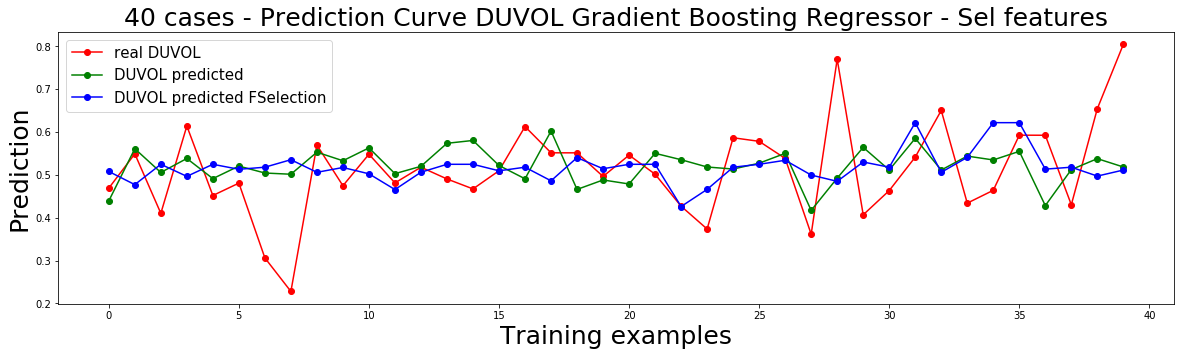

Text(0,0.5,'Predicted')

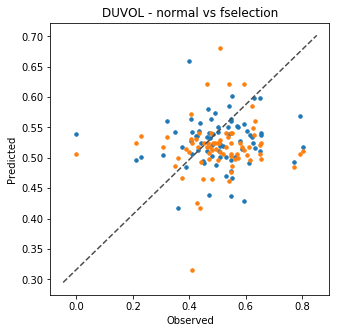

In [136]:
selection_train = list(range(rolling_windows[melhor_DUVOL][0], rolling_windows[melhor_DUVOL][0]+train_samp_number))
selection_test = list(range(rolling_windows[melhor_DUVOL][0]+train_samp_number, rolling_windows[melhor_DUVOL][1]))
X_train,X_test = dataset.iloc[selection_train, 0:N_column], dataset.iloc[selection_test, 0:N_column]
Y_train,Y_test = dataset.iloc[selection_train,N_column:N_column+3], dataset.iloc[selection_test,N_column:N_column+3]


alg = 'Gradient Boosting Regressor - Sel features'
print("-----------------------------------> "+ alg)
#RFE - Recursive Feature Elimination
cv_split2 = model_selection.ShuffleSplit(n_splits = 1, test_size = .2, train_size = .8, random_state = seed )

model_to_fselection = gbr_DUVOL
target_data = Y_train['DUVOL']

#print("base_results")
base_results = model_selection.cross_validate(model_to_fselection, X_train, target_data, cv  = cv_split2)

#base model
print('Initial feature number: ', X_train.shape[1]) 

#print('Feature names: ', X_train.columns.values)
model_to_fselection.fit(X_train, target_data)
#feature selection

model_rfe = feature_selection.RFECV(model_to_fselection, step = 1, cv = cv_split2)#scoring = 'r2_score'
model_rfe.fit(X_train, target_data)

#transform x&y to reduced features and fit new model
#alternative: can use pipeline to reduce fit and transform steps: http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
seleted_columns = X_train.columns.values[model_rfe.get_support()]

rfe_results = model_selection.cross_validate(model_to_fselection, X_train[seleted_columns], target_data, cv  = cv_split2)
#print("rfe_results")
#print(model_rfe.grid_scores_)
print('Final feature number: ', X_train[seleted_columns].shape[1]) 
print('Feature names: ', seleted_columns)



fgbr_DUVOL = GradientBoostingRegressor()

selected_input_train = X_train[seleted_columns]
selected_input_test = X_test[seleted_columns]

fgbr_DUVOL.fit(selected_input_train,Y_train['DUVOL'])

print("-----------------------------------")
#print('DUVOL R2 Score', r2_score(Y_test['DUVOL'], gbr_DUVOL.predict(X_test)))
#print('DUVOL R2 Score Feature selection', r2_score(Y_test['DUVOL'], fgbr_DUVOL.predict(selected_input_test)))
#print('---- ')
print('DUVOL Median Absolute Error', MAE(Y_test['DUVOL'],gbr_DUVOL.predict(X_test)))
print('DUVOL Median Absolute Error Feature selection', MAE(Y_test['DUVOL'],fgbr_DUVOL.predict(selected_input_test)))
print('----')
print('DUVOL Mean Squared Error', MSE(Y_test['DUVOL'],gbr_DUVOL.predict(X_test)))
print('DUVOL Mean Squared Error Feature selection', MSE(Y_test['DUVOL'],fgbr_DUVOL.predict(selected_input_test)))

results_error_fs.append([alg,MAE(Y_test['DUVOL'],fgbr_DUVOL.predict(selected_input_test))])
results_MSE_fs.append([  alg,MSE(Y_test['DUVOL'],fgbr_DUVOL.predict(selected_input_test))])
results_NMAE_fs.append([   alg,NMAE(Y_test['DUVOL'],fgbr_DUVOL.predict(selected_input_test))])

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve DUVOL " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test['DUVOL'][0:40], 'o-', color = 'r', label = 'real DUVOL')
plt.plot(X_test[0:40].reset_index().index, gbr_DUVOL.predict(X_test)[0:40] , 'o-', color = 'g', label = "DUVOL predicted")
plt.plot(X_test[0:40].reset_index().index, fgbr_DUVOL.predict(selected_input_test)[0:40] , 'o-', color = 'b', label = "DUVOL predicted FSelection")
plt.legend(fontsize = 15)
plt.show()


plt.figure(figsize=(5,5))
plt.scatter(Y_test['DUVOL'], gbr_DUVOL.predict(X_test), s=12)
plt.scatter(Y_test['DUVOL'], fgbr_DUVOL.predict(selected_input_test), s=12)
plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")
plt.title("DUVOL - normal vs fselection")
plt.xlabel("Observed")
plt.ylabel("Predicted")

#### CRASH COUNT with feature selection

-----------------------------------> Gradient Boosting Regressor - Sel features
Initial feature number:  48
Final feature number:  4
Feature names:  ['FOG.NRI' 'nWS.2' 'Scrabble' 'meanWordSyllables']
-----------------------------------
CRASH_COUNT Median Absolute Error 0.1348465229099749
CRASH_COUNT Median Absolute Error Feature selection 0.13249204075671972
----
CRASH_COUNT Mean Squared Error 0.026702219461541398
CRASH_COUNT Mean Squared Error Feature selection 0.0267644018800749


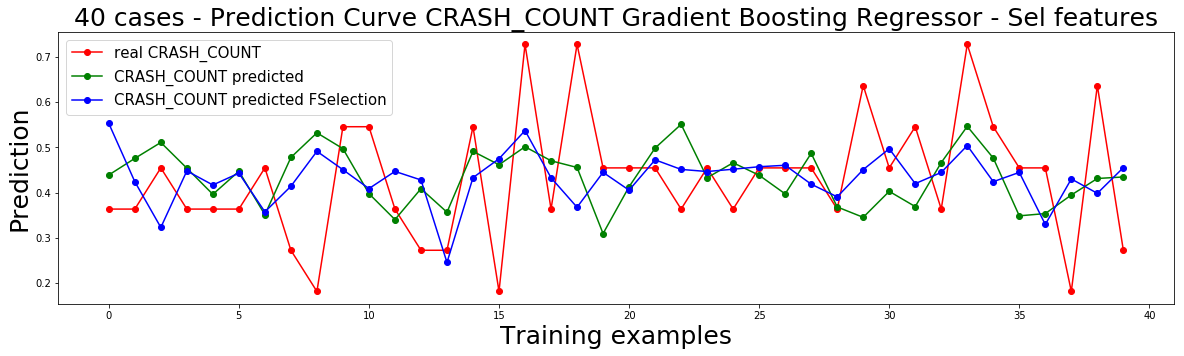

Text(0,0.5,'Predicted')

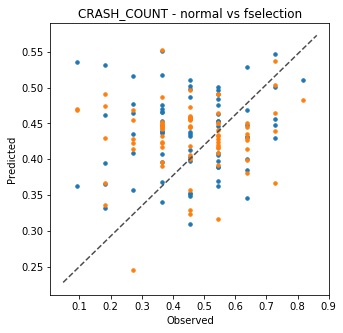

In [137]:
selection_train = list(range(rolling_windows[melhor_CRASH_COUNT][0], rolling_windows[melhor_CRASH_COUNT][0]+train_samp_number))
selection_test = list(range(rolling_windows[melhor_CRASH_COUNT][0]+train_samp_number, rolling_windows[melhor_CRASH_COUNT][1]))
X_train,X_test = dataset.iloc[selection_train, 0:N_column], dataset.iloc[selection_test, 0:N_column]
Y_train,Y_test = dataset.iloc[selection_train,N_column:N_column+3], dataset.iloc[selection_test,N_column:N_column+3]

alg = 'Gradient Boosting Regressor - Sel features'
print("-----------------------------------> "+ alg)
#RFE - Recursive Feature Elimination
cv_split2 = model_selection.ShuffleSplit(n_splits = 1, test_size = .2, train_size = .8, random_state = seed )

model_to_fselection = gbr_CRASH_COUNT
target_data = Y_train['CRASH_COUNT']

#print("base_results")
base_results = model_selection.cross_validate(model_to_fselection, X_train, target_data, cv  = cv_split2)

#base model
print('Initial feature number: ', X_train.shape[1]) 

#print('Feature names: ', X_train.columns.values)
model_to_fselection.fit(X_train, target_data)
#feature selection

model_rfe = feature_selection.RFECV(model_to_fselection, step = 1, cv = cv_split2)#scoring = 'r2_score'
model_rfe.fit(X_train, target_data)

#transform x&y to reduced features and fit new model
#alternative: can use pipeline to reduce fit and transform steps: http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
seleted_columns = X_train.columns.values[model_rfe.get_support()]

rfe_results = model_selection.cross_validate(model_to_fselection, X_train[seleted_columns], target_data, cv  = cv_split2)
#print("rfe_results")
#print(model_rfe.grid_scores_)
print('Final feature number: ', X_train[seleted_columns].shape[1]) 
print('Feature names: ', seleted_columns)



fgbr_CRASH_COUNT = GradientBoostingRegressor()

selected_input_train = X_train[seleted_columns]
selected_input_test = X_test[seleted_columns]

fgbr_CRASH_COUNT.fit(selected_input_train,Y_train['CRASH_COUNT'])

print("-----------------------------------")
#print('CRASH_COUNT R2 Score', r2_score(Y_test['CRASH_COUNT'], gbr_CRASH_COUNT.predict(X_test)))
#print('CRASH_COUNT R2 Score Feature selection', r2_score(Y_test['CRASH_COUNT'], fgbr_CRASH_COUNT.predict(selected_input_test)))
#print('---- ')
print('CRASH_COUNT Median Absolute Error', MAE(Y_test['CRASH_COUNT'],gbr_CRASH_COUNT.predict(X_test)))
print('CRASH_COUNT Median Absolute Error Feature selection', MAE(Y_test['CRASH_COUNT'],fgbr_CRASH_COUNT.predict(selected_input_test)))
print('----')
print('CRASH_COUNT Mean Squared Error', MSE(Y_test['CRASH_COUNT'],gbr_CRASH_COUNT.predict(X_test)))
print('CRASH_COUNT Mean Squared Error Feature selection', MSE(Y_test['CRASH_COUNT'],fgbr_CRASH_COUNT.predict(selected_input_test)))

results_error_fs.append([alg,MAE(Y_test['CRASH_COUNT'],fgbr_CRASH_COUNT.predict(selected_input_test))])
results_MSE_fs.append([  alg,MSE(Y_test['CRASH_COUNT'],fgbr_CRASH_COUNT.predict(selected_input_test))])
results_NMAE_fs.append([   alg,NMAE(Y_test['CRASH_COUNT'],fgbr_CRASH_COUNT.predict(selected_input_test))])

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve CRASH_COUNT " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test['CRASH_COUNT'][0:40], 'o-', color = 'r', label = 'real CRASH_COUNT')
plt.plot(X_test[0:40].reset_index().index, gbr_CRASH_COUNT.predict(X_test)[0:40] , 'o-', color = 'g', label = "CRASH_COUNT predicted")
plt.plot(X_test[0:40].reset_index().index, fgbr_CRASH_COUNT.predict(selected_input_test)[0:40] , 'o-', color = 'b', label = "CRASH_COUNT predicted FSelection")
plt.legend(fontsize = 15)
plt.show()

plt.figure(figsize=(5,5))
plt.scatter( Y_test['CRASH_COUNT'], gbr_CRASH_COUNT.predict(X_test), s=12)
plt.scatter( Y_test['CRASH_COUNT'], fgbr_CRASH_COUNT.predict(selected_input_test), s=12)
plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")
plt.title("CRASH_COUNT - normal vs fselection")
plt.xlabel("Observed")
plt.ylabel("Predicted")

### Decision Tree

#### All Crash Risk measures without feature selection

Decision Tree
melhor dataset: NCSKEW:  1 DUVOL:  2 CRASH_COUNT:  1


Text(0,0.5,'Predicted')

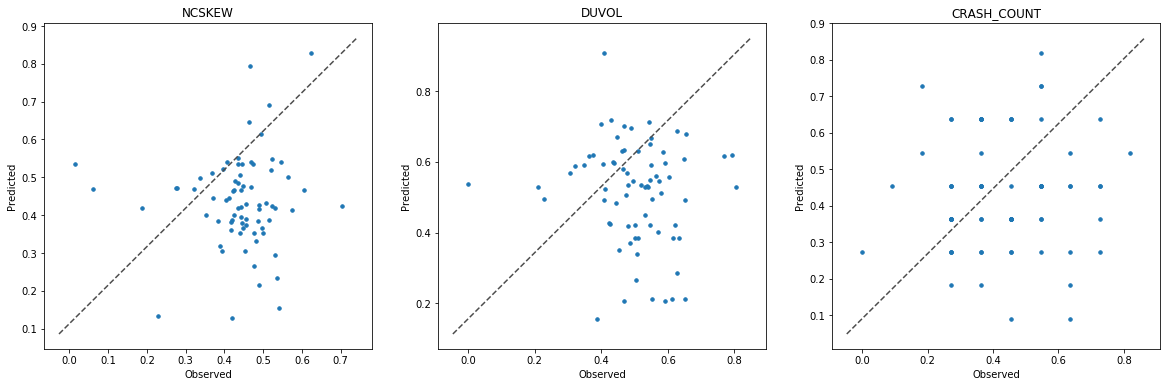

In [138]:
#we will use this code in every model to run the rolling window some times
alg_results_NCSKEW = []
alg_results_DUVOL = []
alg_results_CRASH_COUNT = []

tree_regressor_NCSKEW = []
tree_regressor_DUVOL = []
tree_regressor_CRASH_COUNT = []
for i in range(0,len(rolling_windows)):
    selection_train = list(range(rolling_windows[i][0], rolling_windows[i][0]+train_samp_number))
    selection_test = list(range(rolling_windows[i][0]+train_samp_number, rolling_windows[i][1]))
    X_train,X_test = dataset.iloc[selection_train, 0:N_column], dataset.iloc[selection_test, 0:N_column]
    Y_train,Y_test = dataset.iloc[selection_train,N_column:N_column+3], dataset.iloc[selection_test,N_column:N_column+3]
    
    alg = 'Decision Tree'
    
    tree_regressor_NCSKEW.append(DecisionTreeRegressor())
    tree_regressor_DUVOL.append(DecisionTreeRegressor())
    tree_regressor_CRASH_COUNT.append(DecisionTreeRegressor())

    tree_regressor_NCSKEW[i].fit(X_train,Y_train['NCSKEW'])
    tree_regressor_DUVOL[i].fit(X_train,Y_train['DUVOL'])
    tree_regressor_CRASH_COUNT[i].fit(X_train,Y_train['CRASH_COUNT'])

    
    nmae = NMAE(Y_test['NCSKEW'], tree_regressor_NCSKEW[i].predict(X_test))
    mae = MAE(Y_test['NCSKEW'], tree_regressor_NCSKEW[i].predict(X_test))
    mse = MSE(Y_test['NCSKEW'], tree_regressor_NCSKEW[i].predict(X_test))
    alg_results_NCSKEW.append([i, nmae, mae, mse])
    
    nmae = NMAE(Y_test['DUVOL'], tree_regressor_NCSKEW[i].predict(X_test))
    mae = MAE(Y_test['DUVOL'], tree_regressor_NCSKEW[i].predict(X_test))
    mse = MSE(Y_test['DUVOL'], tree_regressor_NCSKEW[i].predict(X_test))
    alg_results_DUVOL.append([i, nmae, mae, mse])
    
    nmae = NMAE(Y_test['CRASH_COUNT'], tree_regressor_NCSKEW[i].predict(X_test))
    mae = MAE(Y_test['CRASH_COUNT'], tree_regressor_NCSKEW[i].predict(X_test))
    mse = MSE(Y_test['CRASH_COUNT'], tree_regressor_NCSKEW[i].predict(X_test))
    alg_results_CRASH_COUNT.append([i, nmae, mae, mse])
print(alg)
melhor = 999
melhor_NCSKEW =-1
for result in alg_results_NCSKEW:
    if result[3] < melhor:
        melhor = result[3]   #using mse
        melhor_NCSKEW = result[0]
melhor = 999
melhor_DUVOL =-1
for result in alg_results_DUVOL:
    if result[3] < melhor:
        melhor = result[3]
        melhor_DUVOL = result[0]
melhor = 999
melhor_CRASH_COUNT =-1
for result in alg_results_CRASH_COUNT:
    if result[3] < melhor:
        melhor = result[3]
        melhor_CRASH_COUNT = result[0]
print("melhor dataset: NCSKEW: ", melhor_NCSKEW, "DUVOL: ",melhor_DUVOL, "CRASH_COUNT: ", melhor_CRASH_COUNT)    
# [i, nmae, mae, mse]
results_error.append([alg, alg_results_NCSKEW[melhor_NCSKEW][2], alg_results_DUVOL[melhor_DUVOL][2], alg_results_CRASH_COUNT[melhor_CRASH_COUNT][2]])
results_MSE.append([alg, alg_results_NCSKEW[melhor_NCSKEW][3], alg_results_DUVOL[melhor_DUVOL][3], alg_results_CRASH_COUNT[melhor_CRASH_COUNT][3]])
results_NMAE.append([alg, alg_results_NCSKEW[melhor_NCSKEW][1], alg_results_DUVOL[melhor_DUVOL][1], alg_results_CRASH_COUNT[melhor_CRASH_COUNT][1]])

tree_regressor_NCSKEW = tree_regressor_NCSKEW[melhor_NCSKEW]
tree_regressor_DUVOL = tree_regressor_DUVOL[melhor_DUVOL]
tree_regressor_CRASH_COUNT = tree_regressor_CRASH_COUNT[melhor_CRASH_COUNT]


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
axes[0].scatter(Y_test['NCSKEW'], tree_regressor_NCSKEW.predict(X_test), s=12)
axes[0].plot(axes[0].get_xlim(), axes[0].get_ylim(), ls="--", c=".3")
axes[0].set_title("NCSKEW")
axes[0].set_xlabel("Observed")
axes[0].set_ylabel("Predicted")

axes[1].scatter(Y_test['DUVOL'], tree_regressor_DUVOL.predict(X_test), s=12)
axes[1].plot(axes[1].get_xlim(), axes[1].get_ylim(), ls="--", c=".3")
axes[1].set_title("DUVOL")
axes[1].set_xlabel("Observed")
axes[1].set_ylabel("Predicted")

axes[2].scatter(Y_test['CRASH_COUNT'], tree_regressor_CRASH_COUNT.predict(X_test), s=12)
axes[2].plot(axes[2].get_xlim(), axes[2].get_ylim(), ls="--", c=".3")
axes[2].set_title("CRASH_COUNT")
axes[2].set_xlabel("Observed")
axes[2].set_ylabel("Predicted")


#### NCSKEW with feature selection

-----------------------------------> Decision Tree - Seleted features
Initial feature number:  48
Final feature number:  19
Feature names:  ['Coleman' 'Coleman.C2' 'Coleman.Liau.grade' 'Dale.Chall' 'Dale.Chall.old'
 'Danielson.Bryan' 'Danielson.Bryan.2' 'Flesch.PSK' 'FOG.NRI'
 'FORCAST.RGL' 'Fucks' 'LIW' 'nWS.3' 'Scrabble' 'Spache.old' 'Strain'
 'Traenkle.Bailer.2' 'Wheeler.Smith' 'meanWordSyllables']
-----------------------------------
NCSKEW Median Absolute Error 0.11180158420240574
NCSKEW Median Absolute Error Feature selection 0.12802207179655478
----
NCSKEW Mean Squared Error 0.024139168960670067
NCSKEW Mean Squared Error Feature selection 0.029750887105850565


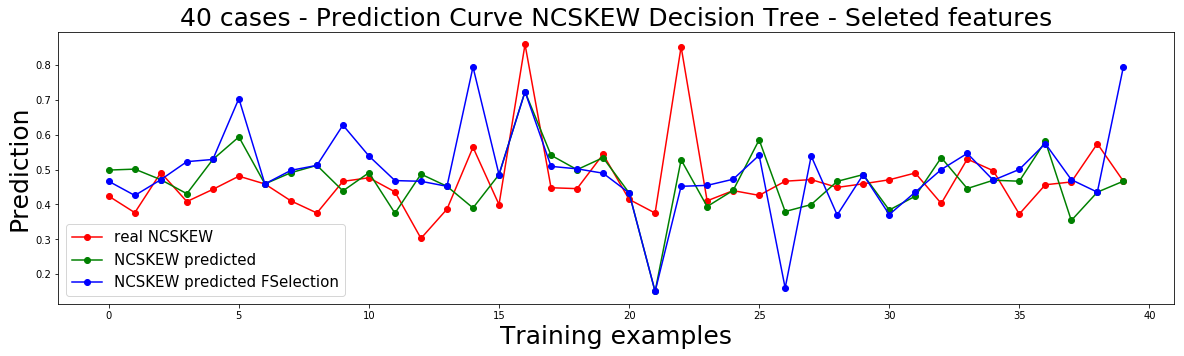

Text(0,0.5,'Predicted')

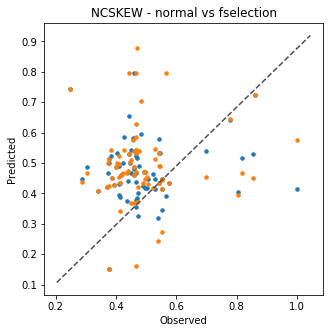

In [139]:
selection_train = list(range(rolling_windows[melhor_NCSKEW][0], rolling_windows[melhor_NCSKEW][0]+train_samp_number))
selection_test = list(range(rolling_windows[melhor_NCSKEW][0]+train_samp_number, rolling_windows[melhor_NCSKEW][1]))
X_train,X_test = dataset.iloc[selection_train, 0:N_column], dataset.iloc[selection_test, 0:N_column]
Y_train,Y_test = dataset.iloc[selection_train,N_column:N_column+3], dataset.iloc[selection_test,N_column:N_column+3]


alg = 'Decision Tree - Seleted features'
print("-----------------------------------> "+ alg)
#RFE - Recursive Feature Elimination
cv_split2 = model_selection.ShuffleSplit(n_splits = 1, test_size = .2, train_size = .8, random_state = seed )

model_to_fselection = tree_regressor_NCSKEW
target_data = Y_train['NCSKEW']

#base model
print('Initial feature number: ', X_train.shape[1]) 

model_rfe = feature_selection.RFECV(model_to_fselection, step = 1, cv = cv_split2)#scoring = 'r2_score'
model_rfe.fit(X_train, target_data)

#transform x&y to reduced features and fit new model
#alternative: can use pipeline to reduce fit and transform steps: http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
seleted_columns = X_train.columns.values[model_rfe.get_support()]

rfe_results = model_selection.cross_validate(model_to_fselection, X_train[seleted_columns], target_data, cv  = cv_split2)
#rfe_results
#print(model_rfe.grid_scores_)
print('Final feature number: ', X_train[seleted_columns].shape[1]) 
print('Feature names: ', seleted_columns)


print("-----------------------------------") 
ftree_regressor_NCSKEW = DecisionTreeRegressor()

selected_input_train = X_train[seleted_columns]
selected_input_test = X_test[seleted_columns]

ftree_regressor_NCSKEW.fit(selected_input_train,Y_train['NCSKEW'])

#print('NCSKEW R2 Score', r2_score(Y_test['NCSKEW'], tree_regressor_NCSKEW.predict(X_test)))
#print('NCSKEW R2 Score Feature selection', r2_score(Y_test['NCSKEW'], ftree_regressor_NCSKEW.predict(selected_input_test)))
#print('---- ')
print('NCSKEW Median Absolute Error', MAE(Y_test['NCSKEW'],tree_regressor_NCSKEW.predict(X_test)))
print('NCSKEW Median Absolute Error Feature selection', MAE(Y_test['NCSKEW'],ftree_regressor_NCSKEW.predict(selected_input_test)))
print('----')
print('NCSKEW Mean Squared Error', MSE(Y_test['NCSKEW'],tree_regressor_NCSKEW.predict(X_test)))
print('NCSKEW Mean Squared Error Feature selection', MSE(Y_test['NCSKEW'],ftree_regressor_NCSKEW.predict(selected_input_test)))

results_error_fs.append([alg,MAE(Y_test['NCSKEW'],ftree_regressor_NCSKEW.predict(selected_input_test))])
results_MSE_fs.append([  alg,MSE(Y_test['NCSKEW'],ftree_regressor_NCSKEW.predict(selected_input_test))])
results_NMAE_fs.append([   alg,NMAE(Y_test['NCSKEW'],ftree_regressor_NCSKEW.predict(selected_input_test))])

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve NCSKEW " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test['NCSKEW'][0:40], 'o-', color = 'r', label = 'real NCSKEW')
plt.plot(X_test[0:40].reset_index().index, tree_regressor_NCSKEW.predict(X_test)[0:40] , 'o-', color = 'g', label = "NCSKEW predicted")
plt.plot(X_test[0:40].reset_index().index, ftree_regressor_NCSKEW.predict(selected_input_test)[0:40] , 'o-', color = 'b', label = "NCSKEW predicted FSelection")
plt.legend(fontsize = 15)
plt.show()

plt.figure(figsize=(5,5))
plt.scatter(Y_test['NCSKEW'], tree_regressor_NCSKEW.predict(X_test), s=12)
plt.scatter(Y_test['NCSKEW'], ftree_regressor_NCSKEW.predict(selected_input_test), s=12)
plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")
plt.title("NCSKEW - normal vs fselection")
plt.xlabel("Observed")
plt.ylabel("Predicted")

#### DUVOL with feature selection

-----------------------------------> Decision Tree - Seleted features
Initial feature number:  48
Final feature number:  1
Feature names:  ['Dale.Chall.PSK']
-----------------------------------
DUVOL Median Absolute Error 0.18116336740082883
DUVOL Median Absolute Error Feature selection 0.13705681189053828
----
DUVOL Mean Squared Error 0.05001707680247165
DUVOL Mean Squared Error Feature selection 0.030619309308624287


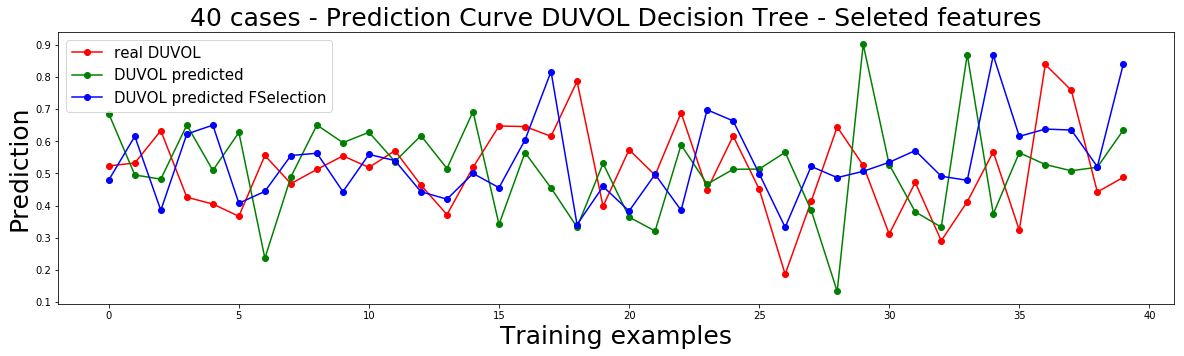

Text(0,0.5,'Predicted')

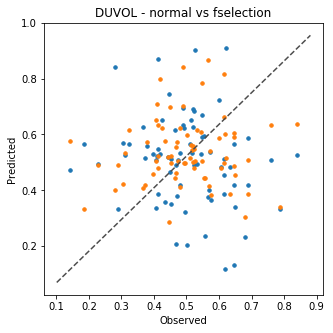

In [140]:
selection_train = list(range(rolling_windows[melhor_DUVOL][0], rolling_windows[melhor_DUVOL][0]+train_samp_number))
selection_test = list(range(rolling_windows[melhor_DUVOL][0]+train_samp_number, rolling_windows[melhor_DUVOL][1]))
X_train,X_test = dataset.iloc[selection_train, 0:N_column], dataset.iloc[selection_test, 0:N_column]
Y_train,Y_test = dataset.iloc[selection_train,N_column:N_column+3], dataset.iloc[selection_test,N_column:N_column+3]


alg = 'Decision Tree - Seleted features'
print("-----------------------------------> "+ alg)
#RFE - Recursive Feature Elimination
cv_split2 = model_selection.ShuffleSplit(n_splits = 1, test_size = .2, train_size = .8, random_state = seed )

model_to_fselection = tree_regressor_DUVOL
target_data = Y_train['DUVOL']

#base model
print('Initial feature number: ', X_train.shape[1]) 

model_rfe = feature_selection.RFECV(model_to_fselection, step = 1, cv = cv_split2)#scoring = 'r2_score'
model_rfe.fit(X_train, target_data)

#transform x&y to reduced features and fit new model
#alternative: can use pipeline to reduce fit and transform steps: http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
seleted_columns = X_train.columns.values[model_rfe.get_support()]

rfe_results = model_selection.cross_validate(model_to_fselection, X_train[seleted_columns], target_data, cv  = cv_split2)
#rfe_results
#print(model_rfe.grid_scores_)
print('Final feature number: ', X_train[seleted_columns].shape[1]) 
print('Feature names: ', seleted_columns)


print("-----------------------------------") 
ftree_regressor_DUVOL = DecisionTreeRegressor()

selected_input_train = X_train[seleted_columns]
selected_input_test = X_test[seleted_columns]

ftree_regressor_DUVOL.fit(selected_input_train,Y_train['DUVOL'])

#print('DUVOL R2 Score', r2_score(Y_test['DUVOL'], tree_regressor_DUVOL.predict(X_test)))
#print('DUVOL R2 Score Feature selection', r2_score(Y_test['DUVOL'], ftree_regressor_DUVOL.predict(selected_input_test)))
#print('---- ')
print('DUVOL Median Absolute Error', MAE(Y_test['DUVOL'],tree_regressor_DUVOL.predict(X_test)))
print('DUVOL Median Absolute Error Feature selection', MAE(Y_test['DUVOL'],ftree_regressor_DUVOL.predict(selected_input_test)))
print('----')
print('DUVOL Mean Squared Error', MSE(Y_test['DUVOL'],tree_regressor_DUVOL.predict(X_test)))
print('DUVOL Mean Squared Error Feature selection', MSE(Y_test['DUVOL'],ftree_regressor_DUVOL.predict(selected_input_test)))

results_error_fs.append([alg,MAE(Y_test['DUVOL'],ftree_regressor_DUVOL.predict(selected_input_test))])
results_MSE_fs.append([  alg,MSE(Y_test['DUVOL'],ftree_regressor_DUVOL.predict(selected_input_test))])
results_NMAE_fs.append([   alg,NMAE(Y_test['DUVOL'],ftree_regressor_DUVOL.predict(selected_input_test))])

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve DUVOL " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test['DUVOL'][0:40], 'o-', color = 'r', label = 'real DUVOL')
plt.plot(X_test[0:40].reset_index().index, tree_regressor_DUVOL.predict(X_test)[0:40] , 'o-', color = 'g', label = "DUVOL predicted")
plt.plot(X_test[0:40].reset_index().index, ftree_regressor_DUVOL.predict(selected_input_test)[0:40] , 'o-', color = 'b', label = "DUVOL predicted FSelection")
plt.legend(fontsize = 15)
plt.show()



plt.figure(figsize=(5,5))
plt.scatter(Y_test['DUVOL'], tree_regressor_DUVOL.predict(X_test), s=12)
plt.scatter(Y_test['DUVOL'], ftree_regressor_DUVOL.predict(selected_input_test), s=12)
plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")
plt.title("DUVOL - normal vs fselection")
plt.xlabel("Observed")
plt.ylabel("Predicted")

#### CRASH COUNT with feature selection

-----------------------------------> Decision Tree - Seleted features
Initial feature number:  48
Final feature number:  14
Feature names:  ['Coleman.C2' 'Dale.Chall' 'ELF' 'Flesch' 'FOG.NRI' 'Fucks' 'LIW' 'nWS'
 'nWS.2' 'RIX' 'SMOG.C' 'Spache' 'Spache.old' 'Strain']
-----------------------------------
CRASH_COUNT Median Absolute Error 0.16093366093366096
CRASH_COUNT Median Absolute Error Feature selection 0.1461916461916462
----
CRASH_COUNT Mean Squared Error 0.04143399597945053
CRASH_COUNT Mean Squared Error Feature selection 0.03830690194326559


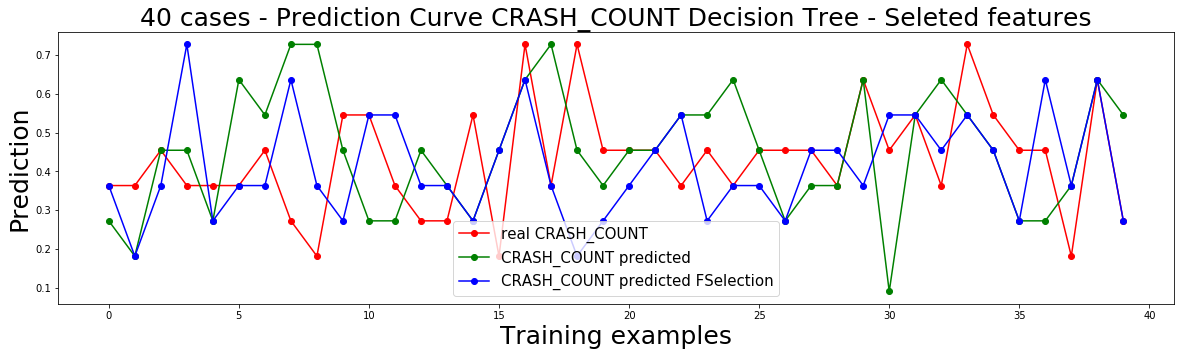

Text(0,0.5,'Predicted')

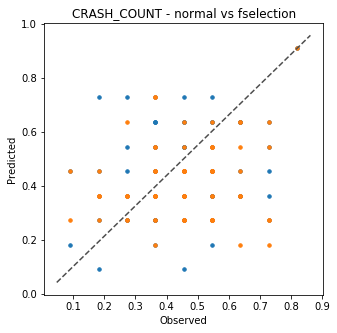

In [141]:
selection_train = list(range(rolling_windows[melhor_CRASH_COUNT][0], rolling_windows[melhor_CRASH_COUNT][0]+train_samp_number))
selection_test = list(range(rolling_windows[melhor_CRASH_COUNT][0]+train_samp_number, rolling_windows[melhor_CRASH_COUNT][1]))
X_train,X_test = dataset.iloc[selection_train, 0:N_column], dataset.iloc[selection_test, 0:N_column]
Y_train,Y_test = dataset.iloc[selection_train,N_column:N_column+3], dataset.iloc[selection_test,N_column:N_column+3]


alg = 'Decision Tree - Seleted features'
print("-----------------------------------> "+ alg)
#RFE - Recursive Feature Elimination
cv_split2 = model_selection.ShuffleSplit(n_splits = 1, test_size = .2, train_size = .8, random_state = seed )

model_to_fselection = tree_regressor_CRASH_COUNT
target_data = Y_train['CRASH_COUNT']

#base model
print('Initial feature number: ', X_train.shape[1]) 

model_rfe = feature_selection.RFECV(model_to_fselection, step = 1, cv = cv_split2)#scoring = 'r2_score'
model_rfe.fit(X_train, target_data)

#transform x&y to reduced features and fit new model
#alternative: can use pipeline to reduce fit and transform steps: http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
seleted_columns = X_train.columns.values[model_rfe.get_support()]

rfe_results = model_selection.cross_validate(model_to_fselection, X_train[seleted_columns], target_data, cv  = cv_split2)
#rfe_results
#print(model_rfe.grid_scores_)
print('Final feature number: ', X_train[seleted_columns].shape[1]) 
print('Feature names: ', seleted_columns)


print("-----------------------------------") 
ftree_regressor_CRASH_COUNT = DecisionTreeRegressor()

selected_input_train = X_train[seleted_columns]
selected_input_test = X_test[seleted_columns]

ftree_regressor_CRASH_COUNT.fit(selected_input_train,Y_train['CRASH_COUNT'])

#print('CRASH_COUNT R2 Score', r2_score(Y_test['CRASH_COUNT'], tree_regressor_CRASH_COUNT.predict(X_test)))
#print('CRASH_COUNT R2 Score Feature selection', r2_score(Y_test['CRASH_COUNT'], ftree_regressor_CRASH_COUNT.predict(selected_input_test)))
#print('---- ')
print('CRASH_COUNT Median Absolute Error', MAE(Y_test['CRASH_COUNT'],tree_regressor_CRASH_COUNT.predict(X_test)))
print('CRASH_COUNT Median Absolute Error Feature selection', MAE(Y_test['CRASH_COUNT'],ftree_regressor_CRASH_COUNT.predict(selected_input_test)))
print('----')
print('CRASH_COUNT Mean Squared Error', MSE(Y_test['CRASH_COUNT'],tree_regressor_CRASH_COUNT.predict(X_test)))
print('CRASH_COUNT Mean Squared Error Feature selection', MSE(Y_test['CRASH_COUNT'],ftree_regressor_CRASH_COUNT.predict(selected_input_test)))

results_error_fs.append([alg,MAE(Y_test['CRASH_COUNT'],ftree_regressor_CRASH_COUNT.predict(selected_input_test))])
results_MSE_fs.append([  alg,MSE(Y_test['CRASH_COUNT'],ftree_regressor_CRASH_COUNT.predict(selected_input_test))])
results_NMAE_fs.append([   alg,NMAE(Y_test['CRASH_COUNT'],ftree_regressor_CRASH_COUNT.predict(selected_input_test))])

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve CRASH_COUNT " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test['CRASH_COUNT'][0:40], 'o-', color = 'r', label = 'real CRASH_COUNT')
plt.plot(X_test[0:40].reset_index().index, tree_regressor_CRASH_COUNT.predict(X_test)[0:40] , 'o-', color = 'g', label = "CRASH_COUNT predicted")
plt.plot(X_test[0:40].reset_index().index, ftree_regressor_CRASH_COUNT.predict(selected_input_test)[0:40] , 'o-', color = 'b', label = "CRASH_COUNT predicted FSelection")
plt.legend(fontsize = 15)
plt.show()

plt.figure(figsize=(5,5))
plt.scatter(Y_test['CRASH_COUNT'], tree_regressor_CRASH_COUNT.predict(X_test), s=12)
plt.scatter(Y_test['CRASH_COUNT'], ftree_regressor_CRASH_COUNT.predict(selected_input_test), s=12)
plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")
plt.title("CRASH_COUNT - normal vs fselection")
plt.xlabel("Observed")
plt.ylabel("Predicted")

### Random Florest

#### All Crash Risk measures without feature selection

Random forest
melhor dataset: NCSKEW:  3 DUVOL:  3 CRASH_COUNT:  0


Text(0,0.5,'Predicted')

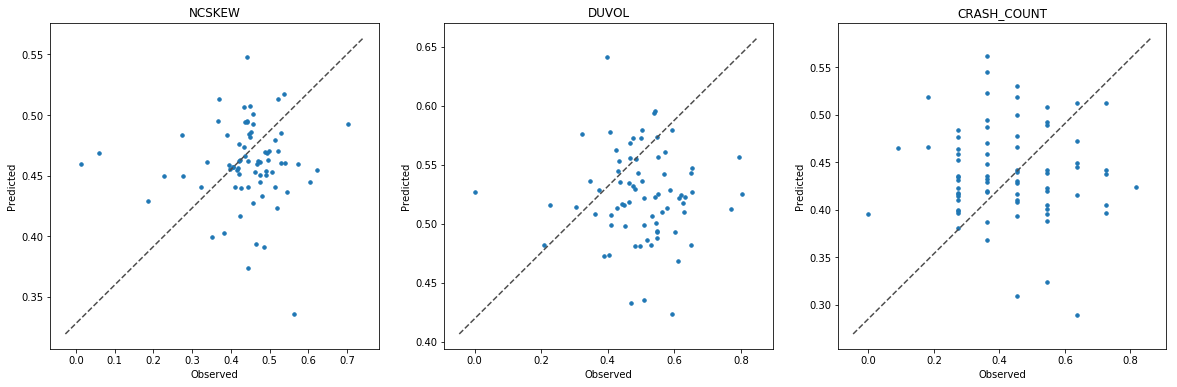

In [142]:
#we will use this code in every model to run the rolling window some times
alg_results_NCSKEW = []
alg_results_DUVOL = []
alg_results_CRASH_COUNT = []

forest_regressor_NCSKEW = []
forest_regressor_DUVOL = []
forest_regressor_CRASH_COUNT = []
for i in range(0,len(rolling_windows)):
    selection_train = list(range(rolling_windows[i][0], rolling_windows[i][0]+train_samp_number))
    selection_test = list(range(rolling_windows[i][0]+train_samp_number, rolling_windows[i][1]))
    X_train,X_test = dataset.iloc[selection_train, 0:N_column], dataset.iloc[selection_test, 0:N_column]
    Y_train,Y_test = dataset.iloc[selection_train,N_column:N_column+3], dataset.iloc[selection_test,N_column:N_column+3]
    
    alg = 'Random forest'
    
    forest_regressor_NCSKEW.append(RandomForestRegressor(n_estimators = 300, random_state = 0))
    forest_regressor_DUVOL.append(RandomForestRegressor(n_estimators = 300, random_state = 0))
    forest_regressor_CRASH_COUNT.append(RandomForestRegressor(n_estimators = 300, random_state = 0))

    forest_regressor_NCSKEW[i].fit(X_train,Y_train['NCSKEW'])
    forest_regressor_DUVOL[i].fit(X_train,Y_train['DUVOL'])
    forest_regressor_CRASH_COUNT[i].fit(X_train,Y_train['CRASH_COUNT'])

    
    nmae = NMAE(Y_test['NCSKEW'], forest_regressor_NCSKEW[i].predict(X_test))
    mae = MAE(Y_test['NCSKEW'], forest_regressor_NCSKEW[i].predict(X_test))
    mse = MSE(Y_test['NCSKEW'], forest_regressor_NCSKEW[i].predict(X_test))
    alg_results_NCSKEW.append([i, nmae, mae, mse])
    
    nmae = NMAE(Y_test['DUVOL'], forest_regressor_NCSKEW[i].predict(X_test))
    mae = MAE(Y_test['DUVOL'], forest_regressor_NCSKEW[i].predict(X_test))
    mse = MSE(Y_test['DUVOL'], forest_regressor_NCSKEW[i].predict(X_test))
    alg_results_DUVOL.append([i, nmae, mae, mse])
    
    nmae = NMAE(Y_test['CRASH_COUNT'], forest_regressor_NCSKEW[i].predict(X_test))
    mae = MAE(Y_test['CRASH_COUNT'], forest_regressor_NCSKEW[i].predict(X_test))
    mse = MSE(Y_test['CRASH_COUNT'], forest_regressor_NCSKEW[i].predict(X_test))
    alg_results_CRASH_COUNT.append([i, nmae, mae, mse])
print(alg)
melhor = 999
melhor_NCSKEW =-1
for result in alg_results_NCSKEW:
    if result[3] < melhor:
        melhor = result[3]   #using mse
        melhor_NCSKEW = result[0]
melhor = 999
melhor_DUVOL =-1
for result in alg_results_DUVOL:
    if result[3] < melhor:
        melhor = result[3]
        melhor_DUVOL = result[0]
melhor = 999
melhor_CRASH_COUNT =-1
for result in alg_results_CRASH_COUNT:
    if result[3] < melhor:
        melhor = result[3]
        melhor_CRASH_COUNT = result[0]
print("melhor dataset: NCSKEW: ", melhor_NCSKEW, "DUVOL: ",melhor_DUVOL, "CRASH_COUNT: ", melhor_CRASH_COUNT)    
# [i, nmae, mae, mse]
results_error.append([alg, alg_results_NCSKEW[melhor_NCSKEW][2], alg_results_DUVOL[melhor_DUVOL][2], alg_results_CRASH_COUNT[melhor_CRASH_COUNT][2]])
results_MSE.append([alg, alg_results_NCSKEW[melhor_NCSKEW][3], alg_results_DUVOL[melhor_DUVOL][3], alg_results_CRASH_COUNT[melhor_CRASH_COUNT][3]])
results_NMAE.append([alg, alg_results_NCSKEW[melhor_NCSKEW][1], alg_results_DUVOL[melhor_DUVOL][1], alg_results_CRASH_COUNT[melhor_CRASH_COUNT][1]])

forest_regressor_NCSKEW = forest_regressor_NCSKEW[melhor_NCSKEW]
forest_regressor_DUVOL = forest_regressor_DUVOL[melhor_DUVOL]
forest_regressor_CRASH_COUNT = forest_regressor_CRASH_COUNT[melhor_CRASH_COUNT]


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
axes[0].scatter(Y_test['NCSKEW'], forest_regressor_NCSKEW.predict(X_test), s=12)
axes[0].plot(axes[0].get_xlim(), axes[0].get_ylim(), ls="--", c=".3")
axes[0].set_title("NCSKEW")
axes[0].set_xlabel("Observed")
axes[0].set_ylabel("Predicted")

axes[1].scatter(Y_test['DUVOL'], forest_regressor_DUVOL.predict(X_test), s=12)
axes[1].plot(axes[1].get_xlim(), axes[1].get_ylim(), ls="--", c=".3")
axes[1].set_title("DUVOL")
axes[1].set_xlabel("Observed")
axes[1].set_ylabel("Predicted")

axes[2].scatter(Y_test['CRASH_COUNT'], forest_regressor_CRASH_COUNT.predict(X_test), s=12)
axes[2].plot(axes[2].get_xlim(), axes[2].get_ylim(), ls="--", c=".3")
axes[2].set_title("CRASH_COUNT")
axes[2].set_xlabel("Observed")
axes[2].set_ylabel("Predicted")

#### NCSKEW with feature selection

-----------------------------------> Random forest - Seleted features
Initial feature number:  48
Final feature number:  41
Feature names:  ['ARI.simple' 'ARI.NRI' 'Bormuth.MC' 'Bormuth.GP' 'Coleman' 'Coleman.C2'
 'Coleman.Liau.ECP' 'Coleman.Liau.grade' 'Coleman.Liau.short' 'Dale.Chall'
 'Dale.Chall.old' 'Dale.Chall.PSK' 'Danielson.Bryan' 'Danielson.Bryan.2'
 'Dickes.Steiwer' 'ELF' 'Farr.Jenkins.Paterson' 'Flesch' 'Flesch.PSK'
 'Flesch.Kincaid' 'FOG' 'FOG.PSK' 'FOG.NRI' 'FORCAST' 'FORCAST.RGL' 'LIW'
 'nWS' 'nWS.2' 'nWS.3' 'nWS.4' 'RIX' 'Scrabble' 'SMOG.C' 'SMOG.de'
 'Spache' 'Spache.old' 'Strain' 'Traenkle.Bailer' 'Traenkle.Bailer.2'
 'Wheeler.Smith' 'meanWordSyllables']
-----------------------------------
NCSKEW Median Absolute Error 0.07693898400326263
NCSKEW Median Absolute Error Feature selection 0.08410132320699779
----


/home/programs/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


NCSKEW Mean Squared Error 0.012569857720290052
NCSKEW Mean Squared Error Feature selection 0.013920840014103944


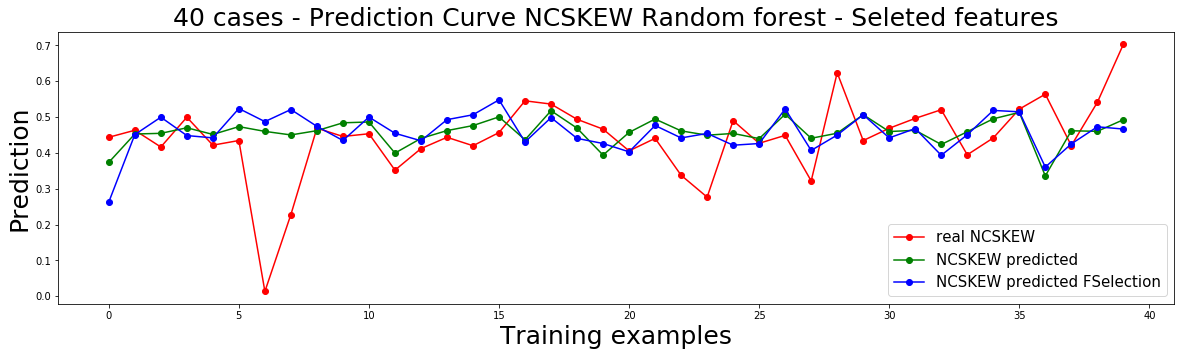

Text(0,0.5,'Predicted')

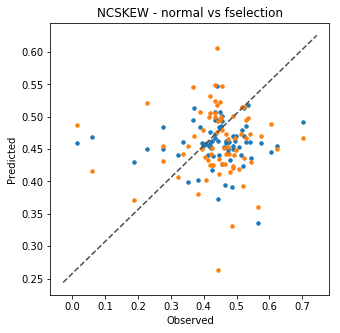

In [143]:
selection_train = list(range(rolling_windows[melhor_NCSKEW][0], rolling_windows[melhor_NCSKEW][0]+train_samp_number))
selection_test = list(range(rolling_windows[melhor_NCSKEW][0]+train_samp_number, rolling_windows[melhor_NCSKEW][1]))
X_train,X_test = dataset.iloc[selection_train, 0:N_column], dataset.iloc[selection_test, 0:N_column]
Y_train,Y_test = dataset.iloc[selection_train,N_column:N_column+3], dataset.iloc[selection_test,N_column:N_column+3]

alg = 'Random forest - Seleted features'
print("-----------------------------------> "+ alg)
#RFE - Recursive Feature Elimination
cv_split2 = model_selection.ShuffleSplit(n_splits = 1, test_size = .2, train_size = .8, random_state = seed )

model_to_fselection = forest_regressor_NCSKEW
target_data = Y_train['NCSKEW']

#base model
print('Initial feature number: ', X_train.shape[1]) 

model_rfe = feature_selection.RFECV(model_to_fselection, step = 1, cv = cv_split2)#scoring = 'r2_score'
model_rfe.fit(X_train, target_data)

#transform x&y to reduced features and fit new model
#alternative: can use pipeline to reduce fit and transform steps: http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
seleted_columns = X_train.columns.values[model_rfe.get_support()]

rfe_results = model_selection.cross_validate(model_to_fselection, X_train[seleted_columns], target_data, cv  = cv_split2)
#rfe_results
#print(model_rfe.grid_scores_)
print('Final feature number: ', X_train[seleted_columns].shape[1]) 
print('Feature names: ', seleted_columns)


print("-----------------------------------") 
fforest_regressor_NCSKEW = RandomForestRegressor()

selected_input_train = X_train[seleted_columns]
selected_input_test = X_test[seleted_columns]

fforest_regressor_NCSKEW.fit(selected_input_train,Y_train['NCSKEW'])

#print('NCSKEW R2 Score', r2_score(Y_test['NCSKEW'], forest_regressor_NCSKEW.predict(X_test)))
#print('NCSKEW R2 Score Feature selection', r2_score(Y_test['NCSKEW'], fforest_regressor_NCSKEW.predict(selected_input_test)))
#print('---- ')
print('NCSKEW Median Absolute Error', MAE(Y_test['NCSKEW'],forest_regressor_NCSKEW.predict(X_test)))
print('NCSKEW Median Absolute Error Feature selection', MAE(Y_test['NCSKEW'],fforest_regressor_NCSKEW.predict(selected_input_test)))
print('----')
print('NCSKEW Mean Squared Error', MSE(Y_test['NCSKEW'],forest_regressor_NCSKEW.predict(X_test)))
print('NCSKEW Mean Squared Error Feature selection', MSE(Y_test['NCSKEW'],fforest_regressor_NCSKEW.predict(selected_input_test)))

results_error_fs.append([alg,MAE(Y_test['NCSKEW'],fforest_regressor_NCSKEW.predict(selected_input_test))])
results_MSE_fs.append([  alg,MSE(Y_test['NCSKEW'],fforest_regressor_NCSKEW.predict(selected_input_test))])
results_NMAE_fs.append([   alg,NMAE(Y_test['NCSKEW'],fforest_regressor_NCSKEW.predict(selected_input_test))])

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve NCSKEW " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test['NCSKEW'][0:40], 'o-', color = 'r', label = 'real NCSKEW')
plt.plot(X_test[0:40].reset_index().index, forest_regressor_NCSKEW.predict(X_test)[0:40] , 'o-', color = 'g', label = "NCSKEW predicted")
plt.plot(X_test[0:40].reset_index().index, fforest_regressor_NCSKEW.predict(selected_input_test)[0:40] , 'o-', color = 'b', label = "NCSKEW predicted FSelection")
plt.legend(fontsize = 15)
plt.show()

plt.figure(figsize=(5,5))
plt.scatter(Y_test['NCSKEW'], forest_regressor_NCSKEW.predict(X_test), s=12)
plt.scatter(Y_test['NCSKEW'], fforest_regressor_NCSKEW.predict(selected_input_test), s=12)
plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")
plt.title("NCSKEW - normal vs fselection")
plt.xlabel("Observed")
plt.ylabel("Predicted")

#### DUVOL with feature selection

In [144]:
selection_train = list(range(rolling_windows[melhor_DUVOL][0], rolling_windows[melhor_DUVOL][0]+train_samp_number))
selection_test = list(range(rolling_windows[melhor_DUVOL][0]+train_samp_number, rolling_windows[melhor_DUVOL][1]))
X_train,X_test = dataset.iloc[selection_train, 0:N_column], dataset.iloc[selection_test, 0:N_column]
Y_train,Y_test = dataset.iloc[selection_train,N_column:N_column+3], dataset.iloc[selection_test,N_column:N_column+3]

alg = 'Random forest - Seleted features'
print("-----------------------------------> "+ alg)
#RFE - Recursive Feature Elimination
cv_split2 = model_selection.ShuffleSplit(n_splits = 1, test_size = .2, train_size = .8, random_state = seed )

model_to_fselection = forest_regressor_DUVOL
target_data = Y_train['DUVOL']

#base model
print('Initial feature number: ', X_train.shape[1]) 

model_rfe = feature_selection.RFECV(model_to_fselection, step = 1, cv = cv_split2)#scoring = 'r2_score'
model_rfe.fit(X_train, target_data)

#transform x&y to reduced features and fit new model
#alternative: can use pipeline to reduce fit and transform steps: http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
seleted_columns = X_train.columns.values[model_rfe.get_support()]

rfe_results = model_selection.cross_validate(model_to_fselection, X_train[seleted_columns], target_data, cv  = cv_split2)
#rfe_results
#print(model_rfe.grid_scores_)
print('Final feature number: ', X_train[seleted_columns].shape[1]) 
print('Feature names: ', seleted_columns)


print("-----------------------------------") 
fforest_regressor_DUVOL = RandomForestRegressor()

selected_input_train = X_train[seleted_columns]
selected_input_test = X_test[seleted_columns]

fforest_regressor_DUVOL.fit(selected_input_train,Y_train['DUVOL'])

#print('DUVOL R2 Score', r2_score(Y_test['DUVOL'], forest_regressor_DUVOL.predict(X_test)))
#print('DUVOL R2 Score Feature selection', r2_score(Y_test['DUVOL'], fforest_regressor_DUVOL.predict(selected_input_test)))
#print('---- ')
print('DUVOL Median Absolute Error', MAE(Y_test['DUVOL'],forest_regressor_DUVOL.predict(X_test)))
print('DUVOL Median Absolute Error Feature selection', MAE(Y_test['DUVOL'],fforest_regressor_DUVOL.predict(selected_input_test)))
print('----')
print('DUVOL Mean Squared Error', MSE(Y_test['DUVOL'],forest_regressor_DUVOL.predict(X_test)))
print('DUVOL Mean Squared Error Feature selection', MSE(Y_test['DUVOL'],fforest_regressor_DUVOL.predict(selected_input_test)))

results_error_fs.append([alg,MAE(Y_test['DUVOL'],fforest_regressor_DUVOL.predict(selected_input_test))])
results_MSE_fs.append([  alg,MSE(Y_test['DUVOL'],fforest_regressor_DUVOL.predict(selected_input_test))])
results_NMAE_fs.append([   alg,NMAE(Y_test['DUVOL'],fforest_regressor_DUVOL.predict(selected_input_test))])

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve DUVOL " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test['DUVOL'][0:40], 'o-', color = 'r', label = 'real DUVOL')
plt.plot(X_test[0:40].reset_index().index, forest_regressor_DUVOL.predict(X_test)[0:40] , 'o-', color = 'g', label = "DUVOL predicted")
plt.plot(X_test[0:40].reset_index().index, fforest_regressor_DUVOL.predict(selected_input_test)[0:40] , 'o-', color = 'b', label = "DUVOL predicted FSelection")
plt.legend(fontsize = 15)
plt.show()


plt.figure(figsize=(5,5))
plt.scatter( Y_test['DUVOL'], forest_regressor_DUVOL.predict(X_test), s=12)
plt.scatter(Y_test['DUVOL'], fforest_regressor_DUVOL.predict(selected_input_test), s=12)
plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")
plt.title("DUVOL - normal vs fselection")
plt.xlabel("Observed")
plt.ylabel("Predicted")

-----------------------------------> Random forest - Seleted features
Initial feature number:  48


KeyboardInterrupt: 

#### CRASH COUNT with feature selection

In [ ]:
selection_train = list(range(rolling_windows[melhor_CRASH_COUNT][0], rolling_windows[melhor_CRASH_COUNT][0]+train_samp_number))
selection_test = list(range(rolling_windows[melhor_CRASH_COUNT][0]+train_samp_number, rolling_windows[melhor_CRASH_COUNT][1]))
X_train,X_test = dataset.iloc[selection_train, 0:N_column], dataset.iloc[selection_test, 0:N_column]
Y_train,Y_test = dataset.iloc[selection_train,N_column:N_column+3], dataset.iloc[selection_test,N_column:N_column+3]

alg = 'Random forest - Seleted features'
print("-----------------------------------> "+ alg)
#RFE - Recursive Feature Elimination
cv_split2 = model_selection.ShuffleSplit(n_splits = 1, test_size = .2, train_size = .8, random_state = seed )

model_to_fselection = forest_regressor_CRASH_COUNT
target_data = Y_train['CRASH_COUNT']

#base model
print('Initial feature number: ', X_train.shape[1]) 

model_rfe = feature_selection.RFECV(model_to_fselection, step = 1, cv = cv_split2)#scoring = 'r2_score'
model_rfe.fit(X_train, target_data)

#transform x&y to reduced features and fit new model
#alternative: can use pipeline to reduce fit and transform steps: http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
seleted_columns = X_train.columns.values[model_rfe.get_support()]

rfe_results = model_selection.cross_validate(model_to_fselection, X_train[seleted_columns], target_data, cv  = cv_split2)
#rfe_results
#print(model_rfe.grid_scores_)
print('Final feature number: ', X_train[seleted_columns].shape[1]) 
print('Feature names: ', seleted_columns)


print("-----------------------------------") 
fforest_regressor_CRASH_COUNT = RandomForestRegressor()

selected_input_train = X_train[seleted_columns]
selected_input_test = X_test[seleted_columns]

fforest_regressor_CRASH_COUNT.fit(selected_input_train,Y_train['CRASH_COUNT'])

#print('CRASH_COUNT R2 Score', r2_score(Y_test['CRASH_COUNT'], forest_regressor_CRASH_COUNT.predict(X_test)))
#print('CRASH_COUNT R2 Score Feature selection', r2_score(Y_test['CRASH_COUNT'], fforest_regressor_CRASH_COUNT.predict(selected_input_test)))
#print('---- ')
print('CRASH_COUNT Median Absolute Error', MAE(Y_test['CRASH_COUNT'],forest_regressor_CRASH_COUNT.predict(X_test)))
print('CRASH_COUNT Median Absolute Error Feature selection', MAE(Y_test['CRASH_COUNT'],fforest_regressor_CRASH_COUNT.predict(selected_input_test)))
print('----')
print('CRASH_COUNT Mean Squared Error', MSE(Y_test['CRASH_COUNT'],forest_regressor_CRASH_COUNT.predict(X_test)))
print('CRASH_COUNT Mean Squared Error Feature selection', MSE(Y_test['CRASH_COUNT'],fforest_regressor_CRASH_COUNT.predict(selected_input_test)))

results_error_fs.append([alg,MAE(Y_test['CRASH_COUNT'],fforest_regressor_CRASH_COUNT.predict(selected_input_test))])
results_MSE_fs.append([  alg,MSE(Y_test['CRASH_COUNT'],fforest_regressor_CRASH_COUNT.predict(selected_input_test))])
results_NMAE_fs.append([   alg,NMAE(Y_test['CRASH_COUNT'],fforest_regressor_CRASH_COUNT.predict(selected_input_test))])

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve CRASH_COUNT " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test['CRASH_COUNT'][0:40], 'o-', color = 'r', label = 'real CRASH_COUNT')
plt.plot(X_test[0:40].reset_index().index, forest_regressor_CRASH_COUNT.predict(X_test)[0:40] , 'o-', color = 'g', label = "CRASH_COUNT predicted")
plt.plot(X_test[0:40].reset_index().index, fforest_regressor_CRASH_COUNT.predict(selected_input_test)[0:40] , 'o-', color = 'b', label = "CRASH_COUNT predicted FSelection")
plt.legend(fontsize = 15)
plt.show()


plt.figure(figsize=(5,5))
plt.scatter(Y_test['CRASH_COUNT'], forest_regressor_CRASH_COUNT.predict(X_test), s=12)
plt.scatter(Y_test['CRASH_COUNT'], fforest_regressor_CRASH_COUNT.predict(selected_input_test), s=12)
plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")
plt.title("CRASH_COUNT - normal vs fselection")
plt.xlabel("Observed")
plt.ylabel("Predicted")

### Multi-layer perceptron regressor

#### All Crash Risk measures without feature selection

Multi-layer perceptron regressor
melhor dataset: NCSKEW:  2 DUVOL:  2 CRASH_COUNT:  0


Text(0,0.5,'Predicted')

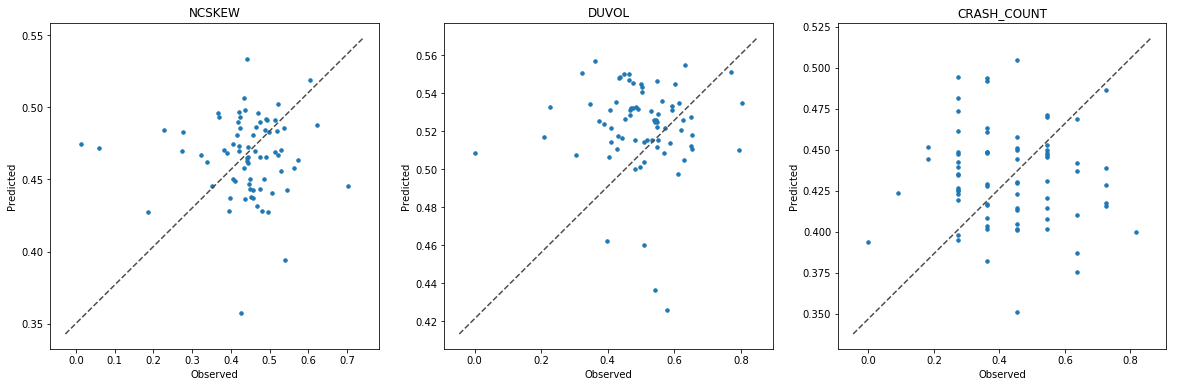

In [147]:
#we will use this code in every model to run the rolling window some times
alg_results_NCSKEW = []
alg_results_DUVOL = []
alg_results_CRASH_COUNT = []

clf_NCSKEW = []
clf_DUVOL = []
clf_CRASH_COUNT = []
for i in range(0,len(rolling_windows)):
    selection_train = list(range(rolling_windows[i][0], rolling_windows[i][0]+train_samp_number))
    selection_test = list(range(rolling_windows[i][0]+train_samp_number, rolling_windows[i][1]))
    X_train,X_test = dataset.iloc[selection_train, 0:N_column], dataset.iloc[selection_test, 0:N_column]
    Y_train,Y_test = dataset.iloc[selection_train,N_column:N_column+3], dataset.iloc[selection_test,N_column:N_column+3]
    
    alg = 'Multi-layer perceptron regressor'
    
    clf_NCSKEW.append(MLPRegressor())
    clf_DUVOL.append(MLPRegressor())
    clf_CRASH_COUNT.append(MLPRegressor())

    clf_NCSKEW[i].fit(X_train,Y_train['NCSKEW'])
    clf_DUVOL[i].fit(X_train,Y_train['DUVOL'])
    clf_CRASH_COUNT[i].fit(X_train,Y_train['CRASH_COUNT'])

    
    nmae = NMAE(Y_test['NCSKEW'], clf_NCSKEW[i].predict(X_test))
    mae = MAE(Y_test['NCSKEW'], clf_NCSKEW[i].predict(X_test))
    mse = MSE(Y_test['NCSKEW'], clf_NCSKEW[i].predict(X_test))
    alg_results_NCSKEW.append([i, nmae, mae, mse])
    
    nmae = NMAE(Y_test['DUVOL'], clf_NCSKEW[i].predict(X_test))
    mae = MAE(Y_test['DUVOL'], clf_NCSKEW[i].predict(X_test))
    mse = MSE(Y_test['DUVOL'], clf_NCSKEW[i].predict(X_test))
    alg_results_DUVOL.append([i, nmae, mae, mse])
    
    nmae = NMAE(Y_test['CRASH_COUNT'], clf_NCSKEW[i].predict(X_test))
    mae = MAE(Y_test['CRASH_COUNT'], clf_NCSKEW[i].predict(X_test))
    mse = MSE(Y_test['CRASH_COUNT'], clf_NCSKEW[i].predict(X_test))
    alg_results_CRASH_COUNT.append([i, nmae, mae, mse])
print(alg)
melhor = 999
melhor_NCSKEW =-1
for result in alg_results_NCSKEW:
    if result[3] < melhor:
        melhor = result[3]   #using mse
        melhor_NCSKEW = result[0]
melhor = 999
melhor_DUVOL =-1
for result in alg_results_DUVOL:
    if result[3] < melhor:
        melhor = result[3]
        melhor_DUVOL = result[0]
melhor = 999
melhor_CRASH_COUNT =-1
for result in alg_results_CRASH_COUNT:
    if result[3] < melhor:
        melhor = result[3]
        melhor_CRASH_COUNT = result[0]
print("melhor dataset: NCSKEW: ", melhor_NCSKEW, "DUVOL: ",melhor_DUVOL, "CRASH_COUNT: ", melhor_CRASH_COUNT)    
# [i, nmae, mae, mse]
results_error.append([alg, alg_results_NCSKEW[melhor_NCSKEW][2], alg_results_DUVOL[melhor_DUVOL][2], alg_results_CRASH_COUNT[melhor_CRASH_COUNT][2]])
results_MSE.append([alg, alg_results_NCSKEW[melhor_NCSKEW][3], alg_results_DUVOL[melhor_DUVOL][3], alg_results_CRASH_COUNT[melhor_CRASH_COUNT][3]])
results_NMAE.append([alg, alg_results_NCSKEW[melhor_NCSKEW][1], alg_results_DUVOL[melhor_DUVOL][1], alg_results_CRASH_COUNT[melhor_CRASH_COUNT][1]])

clf_NCSKEW = clf_NCSKEW[melhor_NCSKEW]
clf_DUVOL = clf_DUVOL[melhor_DUVOL]
clf_CRASH_COUNT = clf_CRASH_COUNT[melhor_CRASH_COUNT]


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
axes[0].scatter(Y_test['NCSKEW'], clf_NCSKEW.predict(X_test), s=12)
axes[0].plot(axes[0].get_xlim(), axes[0].get_ylim(), ls="--", c=".3")
axes[0].set_title("NCSKEW")
axes[0].set_xlabel("Observed")
axes[0].set_ylabel("Predicted")

axes[1].scatter(Y_test['DUVOL'], clf_DUVOL.predict(X_test), s=12)
axes[1].plot(axes[1].get_xlim(), axes[1].get_ylim(), ls="--", c=".3")
axes[1].set_title("DUVOL")
axes[1].set_xlabel("Observed")
axes[1].set_ylabel("Predicted")

axes[2].scatter(Y_test['CRASH_COUNT'], clf_CRASH_COUNT.predict(X_test), s=12)
axes[2].plot(axes[2].get_xlim(), axes[2].get_ylim(), ls="--", c=".3")
axes[2].set_title("CRASH_COUNT")
axes[2].set_xlabel("Observed")
axes[2].set_ylabel("Predicted")

#### WIthout feature selection: The classifier does not expose feature importances

## All results

In [155]:
NCSKEW_results = []
DUVOL_results = []
Crash_Count_results = []
for res_NMAE, res_MSE, res_error in zip(results_NMAE, results_MSE, results_error):
    NCSKEW_results.append([res_NMAE[1], res_MSE[1], res_error[1], res_MSE[0]])
    DUVOL_results.append([res_NMAE[2], res_MSE[2], res_error[2], res_MSE[0]])
    Crash_Count_results.append([res_NMAE[3], res_MSE[3], res_error[3], res_MSE[0]])

#fselection
for i in range(0,3):
    NCSKEW_results.append([results_NMAE_fs[i*3][1], results_MSE_fs[i*3][1], results_error_fs[i*3][1], results_NMAE_fs[i*3][0]])
    DUVOL_results.append([results_NMAE_fs[i*3+1][1], results_MSE_fs[i*3+1][1], results_error_fs[i*3+1][1], results_NMAE_fs[i*3+1][0]])
    Crash_Count_results.append([results_NMAE_fs[i*3+2][1], results_MSE_fs[i*3+2][1], results_error_fs[i*3+2][1], results_NMAE_fs[i*3+2][0]])
    
NCSKEW_results.sort(key=lambda x: x[1] )#reverse=True
DUVOL_results.sort(key=lambda x: x[1] )#reverse=True
Crash_Count_results.sort(key=lambda x: x[1] )#reverse=True

print('_______NCSKEW_______ (SORTED by MSE)')
print(" NMAE | Mean Squared Error (MSE) | Median Absolute Error | Algorithm :")
for res in NCSKEW_results:
    print(res[0], " | ", res[1], " | ", res[2], " | ", res[3])

print('                             ')

print('_______DUVOL_______ (SORTED by MSE)')
print(" NMAE | Mean Squared Error (MSE) | Median Absolute Error | Algorithm :")
for res in DUVOL_results:
    print(res[0], " | ", res[1], " | ", res[2], " | ", res[3])

print('                             ')

print('_______Crash_Count_______ (SORTED by MSE)')
print(" NMAE | Mean Squared Error (MSE) | Median Absolute Error | NMAE Score | Algorithm :")
for res in Crash_Count_results:
    print(res[0], " | ", res[1], " | ", res[2], " | ", res[3])

_______NCSKEW_______ (SORTED by MSE)
 NMAE | Mean Squared Error (MSE) | Median Absolute Error | Algorithm :
0.10224871322773811  |  0.01137674813834423  |  0.0705004856134306  |  Linear regression - Seleted features
0.10629938518396229  |  0.012083656265691347  |  0.07329342384179198  |  Simple Vector Regression
0.10717777772312143  |  0.012097000041570098  |  0.07389907547901116  |  Multi-layer perceptron regressor
0.11058997050940073  |  0.01245246910192538  |  0.07625178233316525  |  Gradient Boosting Regressor
0.11158663721153794  |  0.012569857720290052  |  0.07693898400326263  |  Random forest
0.11203462192874286  |  0.012899954410873203  |  0.07724786945632449  |  Linear regression
0.10007123048794433  |  0.012944595021382056  |  0.07951237132391081  |  Multi-layer perceptron regressor
0.11335769760482507  |  0.01407118304950109  |  0.07816013010707085  |  Gradient Boosting Regressor - Sel features
0.14863819632731687  |  0.024139168960670067  |  0.11180158420240574  |  Decision

## Tuning the best models (Hyper-parameters)

* **Tuning the best 5 models for NCSKEW**

**Mean Squared Error (MSE) | Median Absolute Error | Algorithm :**

0.015753845833957753  |  0.04826090555644891  |  **Linear regression - Seleted features**

0.01623321083876619  |  0.04470691756515255  |  **Simple Vector Regression**

0.016364006197213333  |  0.046340148165256057  |  **Multi-layer perceptron regressor**

0.017023530162187918  |  0.05261852244508189  |  **Gradient Boosting Regressor - Sel features**

0.017806076312648498  |  0.05356984677800536  |  **Random forest - Seleted features**

In [41]:
LinearRegression().get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

### NCSKEW - Linear Regression with feature selection

In [138]:
alg ='Linear Regression - FSelection TUNED'
print("-----------------------------------> "+ alg)

#Selected by rfe
seleted_columns = ['ARI.simple','ARI.NRI','Bormuth.MC','Coleman.C2','Coleman.Liau.ECP',
 'Coleman.Liau.short','Dale.Chall','Dale.Chall.PSK','Danielson.Bryan',
 'Danielson.Bryan.2','DRP','ELF','Farr.Jenkins.Paterson','Flesch',
 'Flesch.PSK','Flesch.Kincaid','Fucks','SMOG.simple','SMOG.de','Spache',
 'Spache.old','Wheeler.Smith','meanSentenceLength','meanWordSyllables']
selected_input_train = X_train[seleted_columns]
selected_input_test = X_test[seleted_columns]

print('Features selected by RFE:') 
print('Feature number:,', X_train[seleted_columns].shape[1]) 
print('Feature names:,', seleted_columns)

#--------------------TUNING

cv= model_selection.ShuffleSplit(n_splits = 1, test_size = .2, train_size = .8, random_state = seed )

my_params = [
  {'fit_intercept': [True, False], 
  'normalize': [True, False]}
 ]
           
linear_reg_model_hyper_NCSKEW = GridSearchCV(flinear_reg_model_NCSKEW, my_params, cv = cv)
linear_reg_model_hyper_NCSKEW.fit(selected_input_train, Y_train['NCSKEW'])

print("-"*10)
print(linear_reg_model_hyper_NCSKEW.best_params_)
#print(linear_reg_model_hyper_NCSKEW.best_score_)
#print(linear_reg_model_hyper_NCSKEW.best_estimator_.score(X_train, Y_train['NCSKEW']))
#-------------------------TUNING

-----------------------------------> Linear Regression - FSelection TUNED
Features selected by RFE:
Feature number:, 24
Feature names:, ['ARI.simple', 'ARI.NRI', 'Bormuth.MC', 'Coleman.C2', 'Coleman.Liau.ECP', 'Coleman.Liau.short', 'Dale.Chall', 'Dale.Chall.PSK', 'Danielson.Bryan', 'Danielson.Bryan.2', 'DRP', 'ELF', 'Farr.Jenkins.Paterson', 'Flesch', 'Flesch.PSK', 'Flesch.Kincaid', 'Fucks', 'SMOG.simple', 'SMOG.de', 'Spache', 'Spache.old', 'Wheeler.Smith', 'meanSentenceLength', 'meanWordSyllables']
----------
{'fit_intercept': False, 'normalize': True}


---- 
NCSKEW Median Absolute Error 0.04826090555644891
NCSKEW Median Absolute Error TUNED 0.04826090555644891
----
NCSKEW Mean Squared Error 0.015753845833957753
NCSKEW Mean Squared Error TUNED 0.015753845833957753


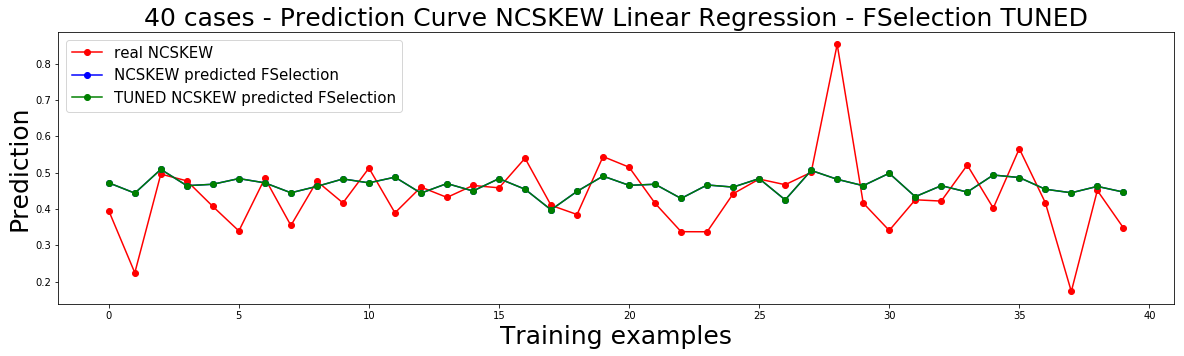

In [139]:
tuned_flinear_reg_model_NCSKEW = LinearRegression(linear_reg_model_hyper_NCSKEW.best_params_)
tuned_flinear_reg_model_NCSKEW.fit(selected_input_train, Y_train['NCSKEW'])

print('---- ')
print('NCSKEW Median Absolute Error', MAE(Y_test['NCSKEW'], flinear_reg_model_NCSKEW.predict(selected_input_test)))
print('NCSKEW Median Absolute Error TUNED', MAE(Y_test['NCSKEW'],tuned_flinear_reg_model_NCSKEW.predict(selected_input_test)))
print('----')
print('NCSKEW Mean Squared Error', MSE(Y_test['NCSKEW'], flinear_reg_model_NCSKEW.predict(selected_input_test)))
print('NCSKEW Mean Squared Error TUNED', MSE(Y_test['NCSKEW'], tuned_flinear_reg_model_NCSKEW.predict(selected_input_test)))

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve NCSKEW " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test['NCSKEW'][0:40], 'o-', color = 'r', label = 'real NCSKEW')
plt.plot(X_test[0:40].reset_index().index, flinear_reg_model_NCSKEW.predict(selected_input_test)[0:40] , 'o-', color = 'b', label = "NCSKEW predicted FSelection")
plt.plot(X_test[0:40].reset_index().index, tuned_flinear_reg_model_NCSKEW.predict(selected_input_test)[0:40] , 'o-', color = 'g', label = "TUNED NCSKEW predicted FSelection")

plt.legend(fontsize = 15)
plt.show()

### NCSKEW - Simple Vector Regression

In [216]:
alg ='Simple Vector Regression - FSelection TUNED'
print("-----------------------------------> "+ alg)

#--------------------TUNING

cv= model_selection.ShuffleSplit(n_splits = 1, test_size = .2, train_size = .8, random_state = seed )

my_params= { 
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'degree': [5,6,8],#1,2,5,3,4,
            'gamma': [0.01, 0.05, 0.1, 0.2, "auto"],#0.0001, 0.001, 1, 3, 5
            'C': [30,80, 100], # 0.1 1000, 60,100, 10, 30
            'epsilon': [0.05, 0.1, 5] #0.0001, 0.0005, 0.001, 0.005 , 0.1,0.5, 1, 5, 10
}
           
svreg_hyper_NCSKEW = GridSearchCV(svreg_NCSKEW, my_params, cv = cv)
svreg_hyper_NCSKEW.fit(X_train, Y_train['NCSKEW'])

print("-"*10)
print(svreg_hyper_NCSKEW.best_params_)
#print(svreg_hyper_NCSKEW.best_score_)
#print(svreg_hyper_NCSKEW.best_estimator_.score(X_train, Y_train['NCSKEW']))
#-------------------------TUNING

-----------------------------------> Simple Vector Regression - FSelection TUNED
----------
{'C': 30, 'degree': 5, 'epsilon': 5, 'gamma': 0.01, 'kernel': 'linear'}


In [42]:
tuned_svreg_NCSKEW = svm.SVR(C= 80, degree= 5, gamma= 0.001, kernel= 'rbf')
tuned_svreg_NCSKEW.fit(X_train, Y_train['NCSKEW'])

print('---- ')
print('NCSKEW Median Absolute Error', MAE(Y_test['NCSKEW'], svreg_NCSKEW.predict(X_test)))
print('NCSKEW Median Absolute Error TUNED', MAE(Y_test['NCSKEW'],tuned_svreg_NCSKEW.predict(X_test)))
print('----')
print('NCSKEW Mean Squared Error', MSE(Y_test['NCSKEW'], svreg_NCSKEW.predict(X_test)))
print('NCSKEW Mean Squared Error TUNED', MSE(Y_test['NCSKEW'], tuned_svreg_NCSKEW.predict(X_test)))

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve NCSKEW " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test['NCSKEW'][0:40], 'o-', color = 'r', label = 'real NCSKEW')
plt.plot(X_test[0:40].reset_index().index, svreg_NCSKEW.predict(X_test)[0:40] , 'o-', color = 'b', label = "NCSKEW predicted FSelection")
plt.plot(X_test[0:40].reset_index().index, tuned_svreg_NCSKEW.predict(X_test)[0:40] , 'o-', color = 'g', label = "TUNED NCSKEW predicted FSelection")

plt.legend(fontsize = 15)
plt.show()

---- 
NCSKEW Median Absolute Error 0.04470691756515255
NCSKEW Median Absolute Error TUNED 0.04593529898655696
----
NCSKEW Mean Squared Error 0.01623321083876619
NCSKEW Mean Squared Error TUNED 0.01618057922155741


### NCSKEW - Multi-Layer-Perceptron model

In [146]:
alg = 'Multi-Layer-Perceptron model - TUNED'
print("-----------------------------------> "+ alg)

#--------------------TUNING
cv= model_selection.ShuffleSplit(n_splits = 1, test_size = .2, train_size = .8, random_state = seed )

my_params = {
    'hidden_layer_sizes': [(100,100,100), (100,50,50,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'max_iter': [400],
    #'alpha': [0.0001, 0.005],
    'learning_rate': ['adaptive'],#'constant',
}
           
clf_hyper_NCSKEW = GridSearchCV(clf_NCSKEW, my_params, cv = cv)
clf_hyper_NCSKEW.fit(X_train, Y_train['NCSKEW'])

print("-"*10)
print(clf_hyper_NCSKEW.best_params_)
#print(clf_hyper_NCSKEW.best_score_)
#print(clf_hyper_NCSKEW.best_estimator_.score(X_train, Y_train['NCSKEW']))
#-------------------------TUNING

-----------------------------------> Multi-Layer-Perceptron model - TUNED
----------
{'activation': 'tanh', 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'adaptive', 'max_iter': 400, 'solver': 'sgd'}


In [172]:
#'activation': 'tanh', 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'adaptive', 'max_iter': 400, 'solver': 'sgd'
#{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'adaptive', 'max_iter': 300, 'solver': 'sgd'}
#'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'
#{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (200, 100, 100, 100, 100), 'learning_rate': 'adaptive', 'solver': 'sgd'}
tuned_clf_NCSKEW = MLPRegressor(activation= 'tanh', hidden_layer_sizes= (100, 100, 100), max_iter=400, learning_rate= 'adaptive', solver= 'sgd')
tuned_clf_NCSKEW.fit(X_train, Y_train['NCSKEW'])

print('----')
print('NCSKEW Median Absolute Error', MAE(Y_test['NCSKEW'], clf_NCSKEW.predict(X_test)))
print('NCSKEW Median Absolute Error TUNED', MAE(Y_test['NCSKEW'],tuned_clf_NCSKEW.predict(X_test)))
print('----')
print('NCSKEW Mean Squared Error', MSE(Y_test['NCSKEW'], clf_NCSKEW.predict(X_test)))
print('NCSKEW Mean Squared Error TUNED', MSE(Y_test['NCSKEW'], tuned_clf_NCSKEW.predict(X_test)))

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve NCSKEW " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test['NCSKEW'][0:40], 'o-', color = 'r', label = 'real NCSKEW')
plt.plot(X_test[0:40].reset_index().index, clf_NCSKEW.predict(X_test)[0:40] , 'o-', color = 'b', label = "NCSKEW predicted FSelection")
plt.plot(X_test[0:40].reset_index().index, tuned_clf_NCSKEW.predict(X_test)[0:40] , 'o-', color = 'g', label = "TUNED NCSKEW predicted FSelection")

plt.legend(fontsize = 15)
plt.show()

----
NCSKEW Median Absolute Error 0.046340148165256057
NCSKEW Median Absolute Error TUNED 0.04627341090079465
----
NCSKEW Mean Squared Error 0.016364006197213333
NCSKEW Mean Squared Error TUNED 0.0157719941048207


### NCSKEW - Gradient Boosting Regressor with feature selection

In [174]:
alg = 'Gradient Boosting Regressor - FSelection TUNED'
print("-----------------------------------> "+ alg)

#Selected by rfe
seleted_columns = ['ARI','ARI.simple','ARI.NRI','Bormuth.MC','Bormuth.GP','Coleman',
 'Coleman.C2','Coleman.Liau.ECP','Coleman.Liau.grade','Coleman.Liau.short',
 'Dale.Chall','Dale.Chall.old','Dale.Chall.PSK','Danielson.Bryan',
 'Danielson.Bryan.2','Dickes.Steiwer','ELF','Flesch','Flesch.PSK',
 'Flesch.Kincaid','FOG','FOG.NRI','FORCAST','FORCAST.RGL','Linsear.Write',
 'LIW','nWS','nWS.2','nWS.3','nWS.4','RIX','Scrabble','SMOG','SMOG.de',
 'Spache','Spache.old','Strain','Traenkle.Bailer.2','Wheeler.Smith',
 'meanWordSyllables']
selected_input_train = X_train[seleted_columns]
selected_input_test = X_test[seleted_columns]

print('Features selected by RFE:') 
print('Feature number: ', X_train[seleted_columns].shape[1]) 
print('Feature names: ', seleted_columns)

#--------------------TUNING

cv= model_selection.ShuffleSplit(n_splits = 1, test_size = .2, train_size = .8, random_state = seed )

my_params = [
  {'fit_intercept': [True, False], 
   'normalize': [True, False]}
 ]

my_params= {'n_estimators':[100,200,300], 
            'learning_rate': [0.1, 0.05, 0.01, 0.001],# 0.1, 0.05, 0.02, 0.01
            'max_depth':[1,3,5,15,30],#4,6], 
            'min_samples_leaf':[0.5,1,3,5],#[3,5,9,17
            'max_features':[1.0,0.3,0.1,0.05,0.01],#1.0,0.3,0.1
           }
           
gbr_hyper_NCSKEW = GridSearchCV(fgbr_NCSKEW, my_params, cv = cv)
gbr_hyper_NCSKEW.fit(selected_input_train, Y_train['NCSKEW'])

print("-"*10)
print(gbr_hyper_NCSKEW.best_params_)
#print(gbr_hyper_NCSKEW.best_score_)
#print(gbr_hyper_NCSKEW.best_estimator_.score(X_train, Y_train['NCSKEW']))
#-------------------------TUNING

-----------------------------------> Gradient Boosting Regressor - FSelection TUNED
Features selected by RFE:
Feature number:  40
Feature names:  ['ARI', 'ARI.simple', 'ARI.NRI', 'Bormuth.MC', 'Bormuth.GP', 'Coleman', 'Coleman.C2', 'Coleman.Liau.ECP', 'Coleman.Liau.grade', 'Coleman.Liau.short', 'Dale.Chall', 'Dale.Chall.old', 'Dale.Chall.PSK', 'Danielson.Bryan', 'Danielson.Bryan.2', 'Dickes.Steiwer', 'ELF', 'Flesch', 'Flesch.PSK', 'Flesch.Kincaid', 'FOG', 'FOG.NRI', 'FORCAST', 'FORCAST.RGL', 'Linsear.Write', 'LIW', 'nWS', 'nWS.2', 'nWS.3', 'nWS.4', 'RIX', 'Scrabble', 'SMOG', 'SMOG.de', 'Spache', 'Spache.old', 'Strain', 'Traenkle.Bailer.2', 'Wheeler.Smith', 'meanWordSyllables']
----------
{'learning_rate': 0.001, 'max_depth': 1, 'max_features': 0.01, 'min_samples_leaf': 0.5, 'n_estimators': 100}


In [191]:
#{'learning_rate': 0.05, 'max_depth': 5, 'max_features': 0.1, 'min_samples_leaf': 1, 'n_estimators': 100}
tuned_fgbr_NCSKEW = GradientBoostingRegressor(learning_rate= 0.05, max_depth= 5, max_features= 0.1, min_samples_leaf= 1, n_estimators= 100)
tuned_fgbr_NCSKEW.fit(selected_input_train, Y_train['NCSKEW'])

print('---- ')
print('NCSKEW Median Absolute Error', MAE(Y_test['NCSKEW'], fgbr_NCSKEW.predict(selected_input_test)))
print('NCSKEW Median Absolute Error TUNED', MAE(Y_test['NCSKEW'],tuned_fgbr_NCSKEW.predict(selected_input_test)))
print('----')
print('NCSKEW Mean Squared Error', MSE(Y_test['NCSKEW'], fgbr_NCSKEW.predict(selected_input_test)))
print('NCSKEW Mean Squared Error TUNED', MSE(Y_test['NCSKEW'], tuned_fgbr_NCSKEW.predict(selected_input_test)))

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve NCSKEW " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test['NCSKEW'][0:40], 'o-', color = 'r', label = 'real NCSKEW')
plt.plot(X_test[0:40].reset_index().index, fgbr_NCSKEW.predict(selected_input_test)[0:40] , 'o-', color = 'b', label = "NCSKEW predicted FSelection")
plt.plot(X_test[0:40].reset_index().index, tuned_fgbr_NCSKEW.predict(selected_input_test)[0:40] , 'o-', color = 'g', label = "TUNED NCSKEW predicted FSelection")

plt.legend(fontsize = 15)
plt.show()

---- 
NCSKEW Median Absolute Error 0.05261852244508189
NCSKEW Median Absolute Error TUNED 0.048886664831483434
----
NCSKEW Mean Squared Error 0.017023530162187918
NCSKEW Mean Squared Error TUNED 0.01727732643606292


### NCSKEW - Random Florest with feature selection

In [193]:
alg = 'Random Florest - FSelection TUNED'
print("-----------------------------------> "+ alg)

#Selected by rfe
seleted_columns = ['Coleman','Coleman.C2','Dale.Chall','Dale.Chall.old','Danielson.Bryan.2',
 'ELF','Flesch','FOG.NRI','FORCAST.RGL','LIW','nWS','nWS.3','Scrabble',
 'Spache','Traenkle.Bailer.2','meanWordSyllables']
selected_input_train = X_train[seleted_columns]
selected_input_test = X_test[seleted_columns]

print('Features selected by RFE:') 
print('Feature number: ', X_train[seleted_columns].shape[1]) 
print('Feature names: ', seleted_columns)

#--------------------TUNING

cv= model_selection.ShuffleSplit(n_splits = 1, test_size = .2, train_size = .8, random_state = seed )

my_params= {'n_estimators':[100,200,300], 
            'criterion': ["MSE", "mae"],
            #'max_depth':[1,3,5,15,30],
            'min_samples_leaf':[0.5,1,3,5],
            'max_features':["auto"],#20,10,1.0,0.3,0.1,0.05,0.01,
           }
           
forest_regressor_hyper_NCSKEW = GridSearchCV(fforest_regressor_NCSKEW, my_params, cv = cv)
forest_regressor_hyper_NCSKEW.fit(selected_input_train, Y_train['NCSKEW'])

print("-"*10)
print(forest_regressor_hyper_NCSKEW.best_params_)
#print(forest_regressor_hyper_NCSKEW.best_score_)
#print(forest_regressor_hyper_NCSKEW.best_estimator_.score(X_train, Y_train['NCSKEW']))
#-------------------------TUNING

-----------------------------------> Random Florest - FSelection TUNED
Features selected by RFE:
Feature number:  16
Feature names:  ['Coleman', 'Coleman.C2', 'Dale.Chall', 'Dale.Chall.old', 'Danielson.Bryan.2', 'ELF', 'Flesch', 'FOG.NRI', 'FORCAST.RGL', 'LIW', 'nWS', 'nWS.3', 'Scrabble', 'Spache', 'Traenkle.Bailer.2', 'meanWordSyllables']
----------
{'criterion': 'MSE', 'max_features': 'auto', 'min_samples_leaf': 0.5, 'n_estimators': 100}


In [210]:
#{'criterion': 'mae', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 0.5, 'n_estimators': 300}
tuned_fforest_regressor_NCSKEW = RandomForestRegressor(criterion= 'mae', max_features='auto', min_samples_leaf= 1, n_estimators= 100)
tuned_fforest_regressor_NCSKEW.fit(selected_input_train, Y_train['NCSKEW'])

print('---- ')
print('NCSKEW Median Absolute Error', MAE(Y_test['NCSKEW'], fforest_regressor_NCSKEW.predict(selected_input_test)))
print('NCSKEW Median Absolute Error TUNED', MAE(Y_test['NCSKEW'],tuned_fforest_regressor_NCSKEW.predict(selected_input_test)))
print('----')
print('NCSKEW Mean Squared Error', MSE(Y_test['NCSKEW'], fforest_regressor_NCSKEW.predict(selected_input_test)))
print('NCSKEW Mean Squared Error TUNED', MSE(Y_test['NCSKEW'], tuned_fforest_regressor_NCSKEW.predict(selected_input_test)))

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve NCSKEW " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test['NCSKEW'][0:40], 'o-', color = 'r', label = 'real NCSKEW')
plt.plot(X_test[0:40].reset_index().index, fforest_regressor_NCSKEW.predict(selected_input_test)[0:40] , 'o-', color = 'b', label = "NCSKEW predicted FSelection")
plt.plot(X_test[0:40].reset_index().index, tuned_fforest_regressor_NCSKEW.predict(selected_input_test)[0:40] , 'o-', color = 'g', label = "TUNED NCSKEW predicted FSelection")

plt.legend(fontsize = 15)
plt.show()

---- 
NCSKEW Median Absolute Error 0.05356984677800536
NCSKEW Median Absolute Error TUNED 0.047633137723433
----
NCSKEW Mean Squared Error 0.017806076312648498
NCSKEW Mean Squared Error TUNED 0.016796069090185065


## Save results, data and algorithms

In [140]:
# import pickle
# s = pickle.dumps(clf)
# clf2 = pickle.loads(s)
# clf2.predict(X[0:1])
# array([0])
# y[0]

from joblib import dump, load

dump(X_train, 'X_train.joblib') 
dump(X_test, 'X_test.joblib') 
dump(Y_train, 'Y_train.joblib') 
dump(Y_test, 'Y_test.joblib') 
dump(results_MSE, 'results_MSE.joblib') 
dump(results_error, 'results_error.joblib') 
dump(results_r2, 'results_r2.joblib') 
dump(results_MSE_fs, 'results_MSE_fs.joblib') 
dump(results_error_fs, 'results_error_fs.joblib') 
dump(results_r2_fs, 'results_r2_fs.joblib') 

#clf = load('filename.joblib') 

['results_r2_fs.joblib']

In [215]:
dump(tuned_flinear_reg_model_NCSKEW, 'tuned_flinear_reg_model_NCSKEW.joblib') 
dump(tuned_svreg_NCSKEW, 'tuned_svreg_NCSKEW.joblib') 
dump(tuned_clf_NCSKEW, 'tuned_clf_NCSKEW.joblib') 
dump(tuned_fgbr_NCSKEW, 'tuned_fgbr_NCSKEW.joblib') 
dump(tuned_fforest_regressor_NCSKEW, 'tuned_fforest_regressor_NCSKEW.joblib') 

['tuned_fforest_regressor_NCSKEW.joblib']

In [11]:
from joblib import dump, load
X_train = load('X_train.joblib') 
X_test = load('X_test.joblib') 
Y_train = load('Y_train.joblib') 
Y_test = load('Y_test.joblib') 